## Chicago crime data analysis

#### import libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from shapely import wkt
import os
import geopandas as gpd
import seaborn as sns

### Read data and General Analysis

#### data check

In [ ]:
file_path = r"data_classified.csv"
data = pd.read_csv(file_path)

print(data.head())


   unique_key case_number                     date                 block  \
0    13149899    JG352235  2023-07-22 23:56:00 UTC      001XX N STATE ST   
1    13273312    JG499346  2023-11-10 18:07:00 UTC  001XX N MICHIGAN AVE   
2    12977363    JG145925  2023-02-08 22:00:00 UTC     0000X E WACKER DR   
3    13052875    JG236232  2023-04-24 23:15:00 UTC       0000X E LAKE ST   
4    13250599    JG472137  2023-10-21 00:00:00 UTC      002XX N STATE ST   

   iucr primary_type              description location_description  arrest  \
0  031A      ROBBERY          ARMED - HANDGUN             SIDEWALK   False   
1  0460      BATTERY                   SIMPLE               STREET   False   
2  0460      BATTERY                   SIMPLE    CONVENIENCE STORE   False   
3  0460      BATTERY                   SIMPLE              CTA BUS   False   
4  0486      BATTERY  DOMESTIC BATTERY SIMPLE        HOTEL / MOTEL   False   

   domestic  ...                            location  season  \
0     Fals

In [ ]:
data.columns


Index(['unique_key', 'case_number', 'date', 'block', 'iucr', 'primary_type',
       'description', 'location_description', 'arrest', 'domestic', 'beat',
       'district', 'ward', 'community_area', 'fbi_code', 'x_coordinate',
       'y_coordinate', 'year', 'updated_on', 'latitude', 'longitude',
       'location', 'season', 'crime_category', 'index_right', 'PRI_NEIGH',
       'SEC_NEIGH', 'SHAPE_AREA', 'SHAPE_LEN', 'category',
       'location_category'],
      dtype='object')

In [ ]:
data['primary_type'].unique()

array(['ROBBERY', 'BATTERY', 'ASSAULT', 'THEFT', 'MOTOR VEHICLE THEFT',
       'DECEPTIVE PRACTICE', 'CRIMINAL TRESPASS', 'WEAPONS VIOLATION',
       'OTHER OFFENSE', 'BURGLARY', 'CRIMINAL DAMAGE', 'SEX OFFENSE',
       'LIQUOR LAW VIOLATION', 'CONCEALED CARRY LICENSE VIOLATION',
       'CRIMINAL SEXUAL ASSAULT', 'NARCOTICS', 'PUBLIC PEACE VIOLATION',
       'STALKING', 'INTIMIDATION', 'HOMICIDE',
       'OFFENSE INVOLVING CHILDREN', 'INTERFERENCE WITH PUBLIC OFFICER',
       'ARSON', 'PROSTITUTION', 'KIDNAPPING', 'OBSCENITY',
       'HUMAN TRAFFICKING', 'OTHER NARCOTIC VIOLATION', 'GAMBLING',
       'PUBLIC INDECENCY', 'NON-CRIMINAL'], dtype=object)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261039 entries, 0 to 261038
Data columns (total 31 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   unique_key            261039 non-null  int64  
 1   case_number           261039 non-null  object 
 2   date                  261039 non-null  object 
 3   block                 261039 non-null  object 
 4   iucr                  261039 non-null  object 
 5   primary_type          261039 non-null  object 
 6   description           261039 non-null  object 
 7   location_description  259678 non-null  object 
 8   arrest                261039 non-null  bool   
 9   domestic              261039 non-null  bool   
 10  beat                  261039 non-null  int64  
 11  district              261039 non-null  float64
 12  ward                  261036 non-null  float64
 13  community_area        261039 non-null  float64
 14  fbi_code              261039 non-null  object 
 15  

In [ ]:
data.isnull().sum()

unique_key                 0
case_number                0
date                       0
block                      0
iucr                       0
primary_type               0
description                0
location_description    1361
arrest                     0
domestic                   0
beat                       0
district                   0
ward                       3
community_area             0
fbi_code                   0
x_coordinate               0
y_coordinate               0
year                       0
updated_on                 0
latitude                   0
longitude                  0
location                   0
season                     0
crime_category             0
index_right                0
PRI_NEIGH                  0
SEC_NEIGH                  0
SHAPE_AREA                 0
SHAPE_LEN                  0
category                   0
location_category          0
dtype: int64

In [ ]:
# Summary Statistics
data.describe()

unique_key           beat       district           ward  \
count  2.610390e+05  261039.000000  261039.000000  261036.000000   
mean   1.310589e+07    1153.686062      11.306950      23.099140   
std    6.507072e+05     711.571376       7.110759      14.003164   
min    2.727900e+04     111.000000       1.000000       1.000000   
25%    1.303919e+07     533.000000       5.000000      10.000000   
50%    1.313731e+07    1032.000000      10.000000      23.000000   
75%    1.323355e+07    1731.000000      17.000000      34.000000   
max    1.367236e+07    2535.000000      31.000000      50.000000   

       community_area  x_coordinate  y_coordinate      year       latitude  \
count   261039.000000  2.610390e+05  2.610390e+05  261039.0  261039.000000   
mean        36.268577  1.165404e+06  1.887316e+06    2023.0      41.846375   
std         21.540191  1.628108e+04  3.167634e+04       0.0       0.087109   
min          1.000000  1.094886e+06  1.813897e+06    2023.0      41.644590   
25%         22.000000  1.153997e+06  1.859899e+06    2023.0      41.770893   
50%         32.000000  1.167142e+06  1.893505e+06    2023.0      41.863443   
75%         53.000000  1.176809e+06  1.910348e+06    2023.0      41.909876   
max         77.000000  1.205114e+06  1.951506e+06    2023.0      42.022549   

           longitude    index_right    SHAPE_AREA      SHAPE_LEN  
count  261039.000000  261039.000000  2.610390e+05  261039.000000  
mean      -87.668509      46.294883  8.621660e+07   43942.782156  
std         0.059272      29.184949  5.149443e+07   16291.346045  
min       -87.926341       0.000000  8.824051e+05    6099.310646  
25%       -87.710003      19.000000  5.125990e+07   34052.397576  
50%       -87.661905      47.000000  8.181272e+07   44460.919220  
75%       -87.626683      69.000000  1.050654e+08   52435.979431  
max       -87.524639      97.000000  3.718356e+08  173625.984660

In [ ]:
# Unique Values in Categorical Columns
categorical_columns = ['primary_type', 'description', 'location_description', 'season', 'crime_category', 'SEC_NEIGH']
for column in categorical_columns:
    print(f"{column}: {data[column].nunique()} unique values")

primary_type: 31 unique values
description: 295 unique values
location_description: 132 unique values
season: 4 unique values
crime_category: 5 unique values
SEC_NEIGH: 78 unique values


#### general visualization

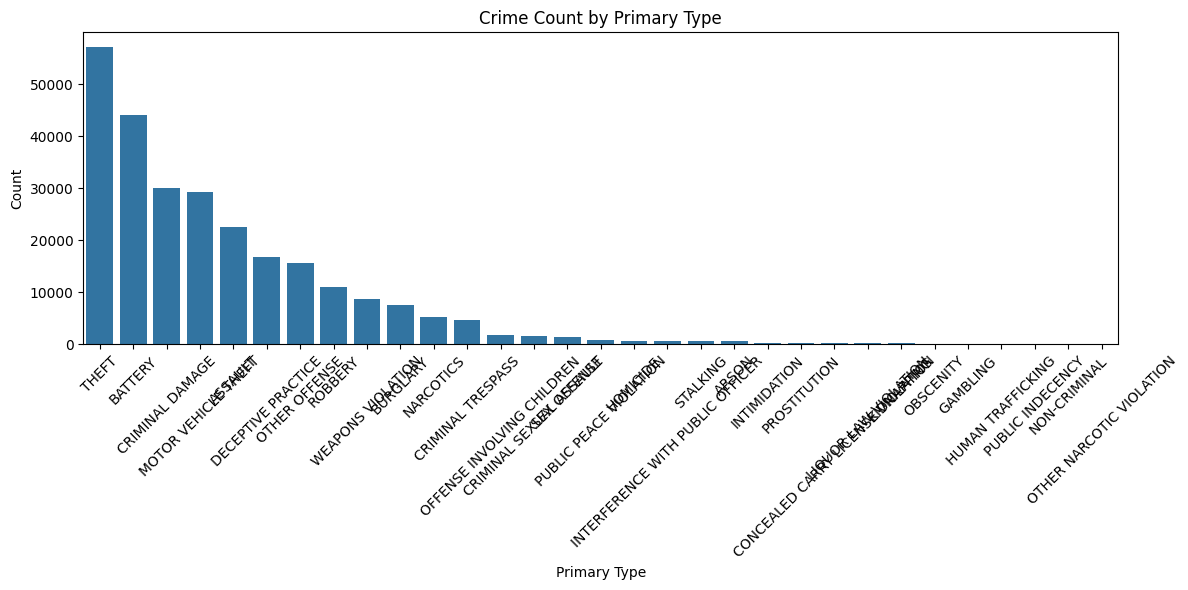

In [ ]:
import seaborn as sns
## Plot the distribution of crimes by type
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='primary_type', order=data['primary_type'].value_counts().index)
plt.title('Crime Count by Primary Type')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.xlabel('Primary Type')
plt.tight_layout()
plt.show()

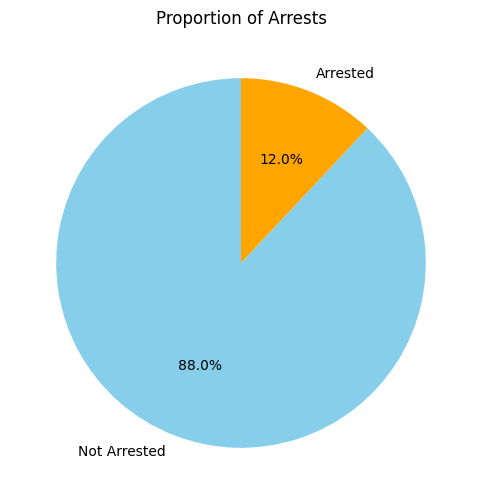

In [ ]:
## Plot the distribution of arrests
plt.figure(figsize=(6, 6))
data['arrest'].value_counts().plot.pie(
    autopct='%1.1f%%',
    labels=['Not Arrested', 'Arrested'],
    startangle=90,
    colors=['skyblue', 'orange']
)
plt.title('Proportion of Arrests')
plt.ylabel('')
plt.show()


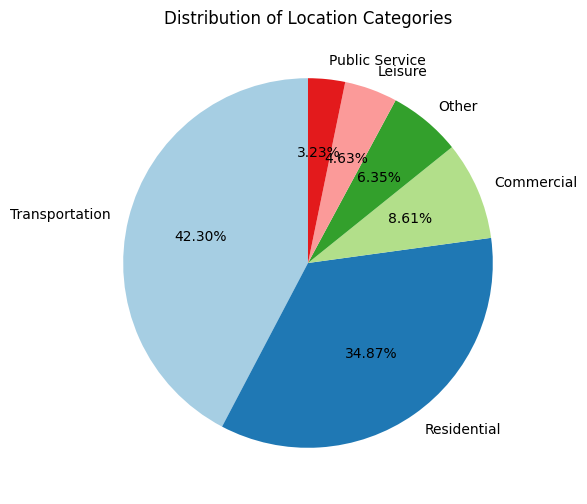

In [ ]:
category_counts = data['location_category'].value_counts()

plt.figure(figsize=(8, 6))
category_counts.plot.pie(
    autopct="%.2f%%",
    startangle=90,
    colors=plt.cm.Paired.colors,
    ylabel='',
)
plt.title('Distribution of Location Categories')
plt.show()

/var/folders/0r/y561qk1n7012xcwm8xw6vnqr0000gn/T/ipykernel_64806/1519585644.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='season', order=['Winter', 'Spring', 'Summer', 'Fall'], palette='coolwarm')


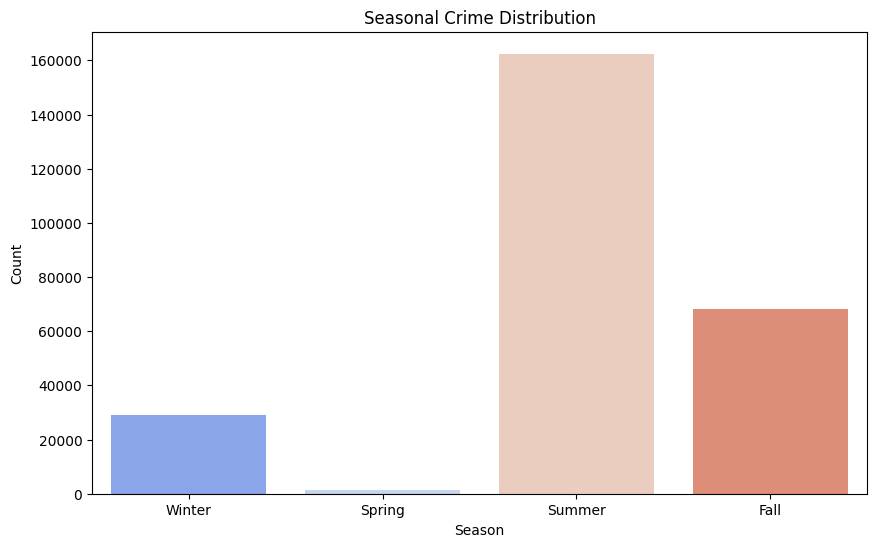

In [ ]:
## Seasonal distribution of crimes
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='season', order=['Winter', 'Spring', 'Summer', 'Fall'], palette='coolwarm')
plt.title('Seasonal Crime Distribution')
plt.xlabel('Season')
plt.ylabel('Count')
plt.show()

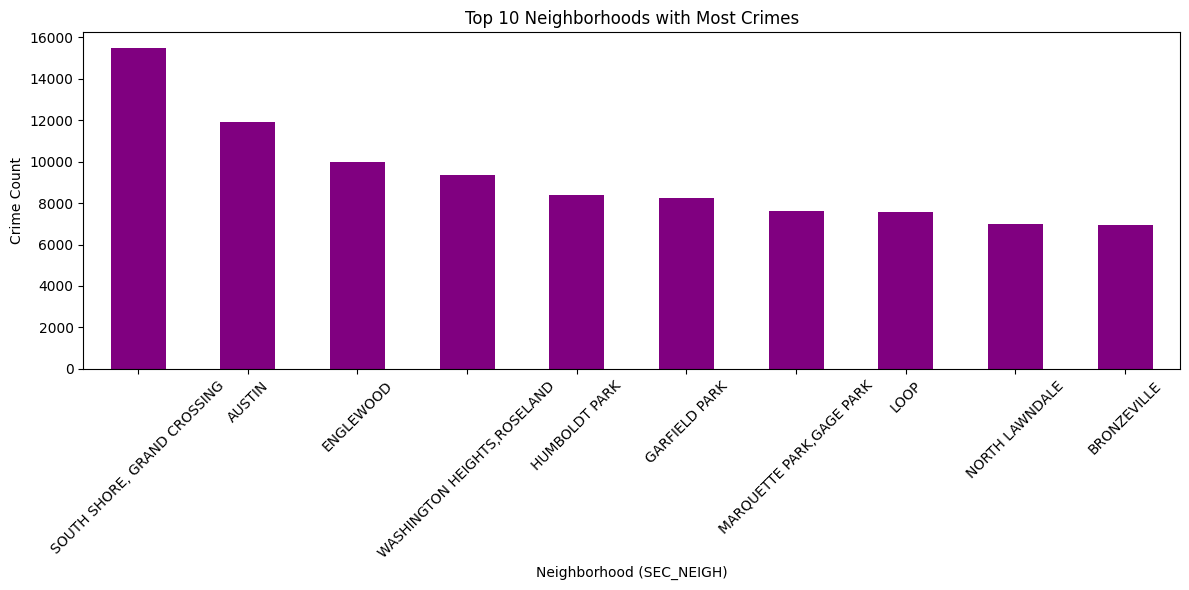

In [ ]:
## Plot the crime count by SEC_NEIGH
plt.figure(figsize=(12, 6))
data['SEC_NEIGH'].value_counts().head(10).plot(kind='bar', color='purple')
plt.title('Top 10 Neighborhoods with Most Crimes')
plt.xlabel('Neighborhood (SEC_NEIGH)')
plt.ylabel('Crime Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Insights into arrest and crime categories
## Cross-tabulate arrest status and crime categories
arrest_vs_crime_category = pd.crosstab(data['arrest'], data['crime_category'])
print("\n### Arrests vs. Crime Categories ###")
print(arrest_vs_crime_category)


### Arrests vs. Crime Categories ###
crime_category  Light_Against_Person  Light_Against_Property  Others  \
arrest                                                                 
False                           2383                   19533   17546   
True                             199                    2022   13895   

crime_category  Serious_Against_Person  Serious_Against_Property  
arrest                                                            
False                            70949                    119310  
True                             10265                      4937  


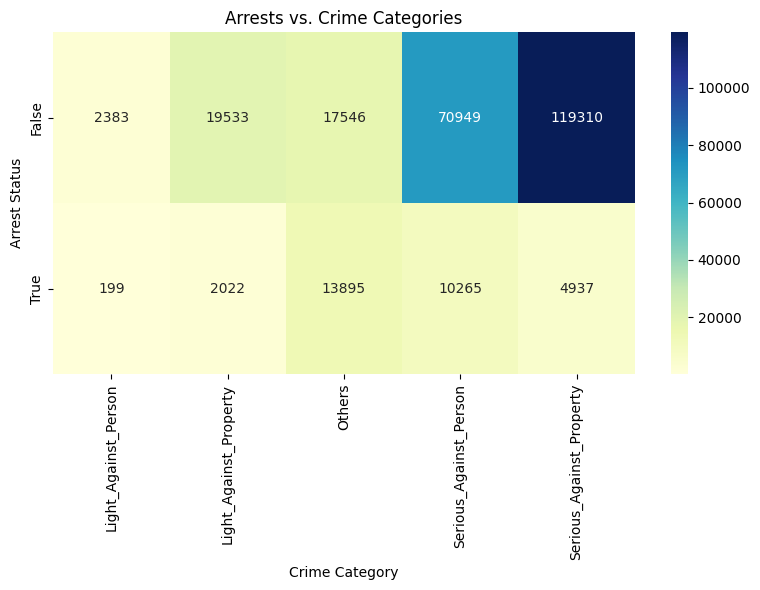

In [ ]:
## Heatmap for Arrests vs. Crime Categories
plt.figure(figsize=(8, 6))
sns.heatmap(arrest_vs_crime_category, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Arrests vs. Crime Categories')
plt.xlabel('Crime Category')
plt.ylabel('Arrest Status')
plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(data['primary_type'], data['location_category'])
# Chi-Square Test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print("Chi-Square Statistic:", chi2)
print("P-value:", p_value)
print("Degrees of Freedom:", dof)

# Significance level
alpha = 0.05

if p_value < alpha:
    print("There is a significant association between location description and crime category")
else:
    print("No significant association between location description and crime category")

# Cramér's V Calculation
def cramers_v(contingency_table):
    chi2, _, _, _ = chi2_contingency(contingency_table)
    n = contingency_table.to_numpy().sum()
    min_dim = min(contingency_table.shape) - 1
    if min_dim == 0:
        raise ValueError("Cramér's V cannot be calculated due to insufficient data dimensions.")
    return np.sqrt(chi2 / (n * min_dim))

try:
    v_value = cramers_v(contingency_table)
    print("Cramer's V Association Strength:", v_value)
except ValueError as e:
    print(e)

Chi-Square Statistic: 90171.66422523178
P-value: 0.0
Degrees of Freedom: 150
There is a significant association between location description and crime category
Cramer's V Association Strength: 0.26284356070370235


#### group analysis

/var/folders/0r/y561qk1n7012xcwm8xw6vnqr0000gn/T/ipykernel_64806/110049975.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('tab20', num_colors).colors


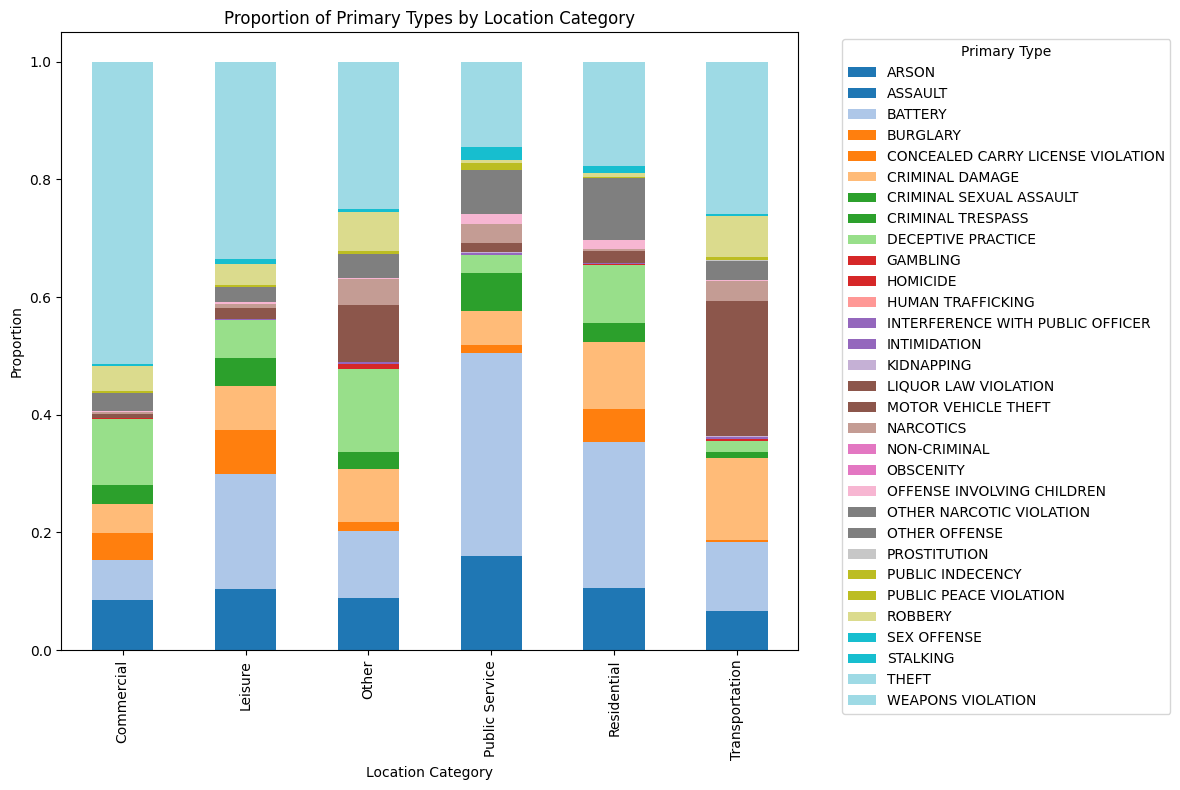

In [ ]:
grouped = data.groupby(['location_category', 'primary_type']).size().unstack(fill_value=0)


percentage = grouped.div(grouped.sum(axis=1), axis=0)

num_colors = len(percentage.columns)
colors = cm.get_cmap('tab20', num_colors).colors

plt.figure(figsize=(12, 8))
percentage.plot(kind='bar', stacked=True, color=colors, ax=plt.gca())

plt.title('Proportion of Primary Types by Location Category')
plt.ylabel('Proportion')
plt.xlabel('Location Category')
plt.legend(title='Primary Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

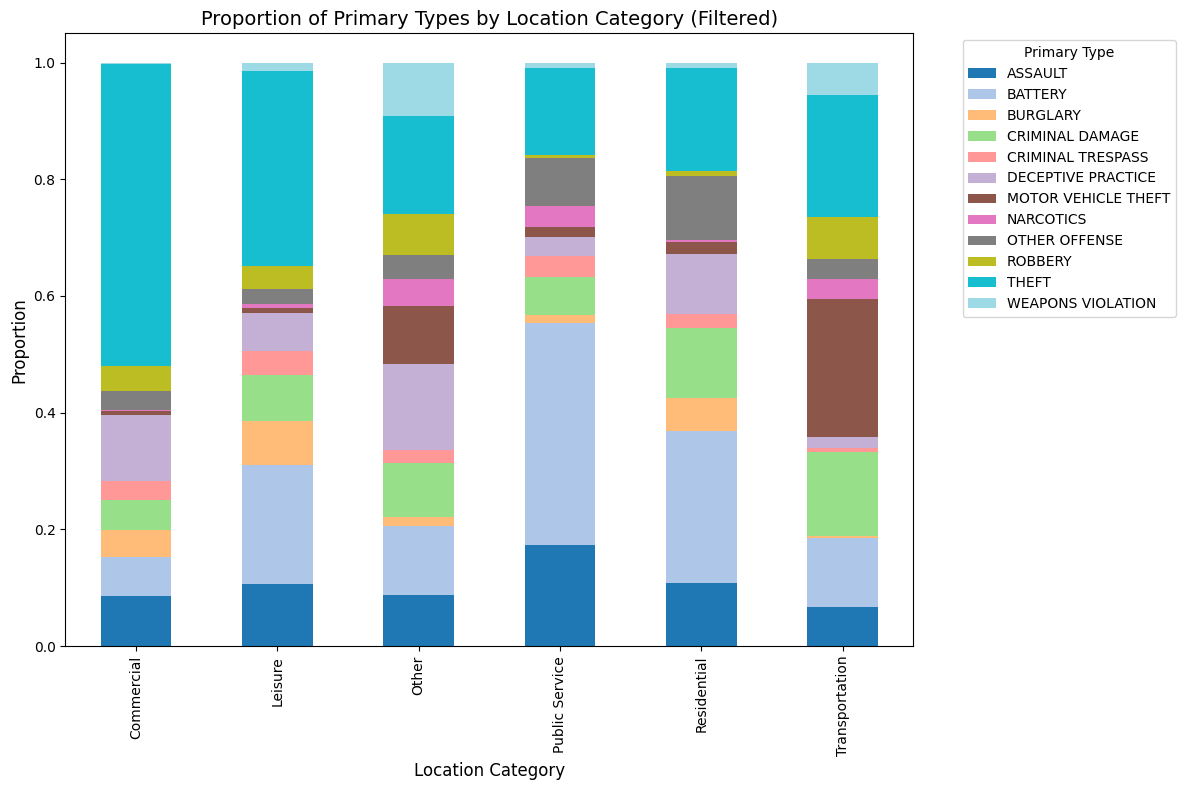

In [ ]:
grouped = data.groupby(['location_category', 'primary_type']).size().unstack(fill_value=0)

threshold = 3000
filtered_grouped = grouped.loc[:, grouped.sum(axis=0) >= threshold]

percentage = filtered_grouped.div(filtered_grouped.sum(axis=1), axis=0)


plt.figure(figsize=(12, 8))
percentage.plot(kind='bar', stacked=True, colormap="tab20", ax=plt.gca())

plt.title('Proportion of Primary Types by Location Category (Filtered)', fontsize=14)
plt.ylabel('Proportion', fontsize=12)
plt.xlabel('Location Category', fontsize=12)
plt.legend(title='Primary Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Space analysis

#### borough analysis

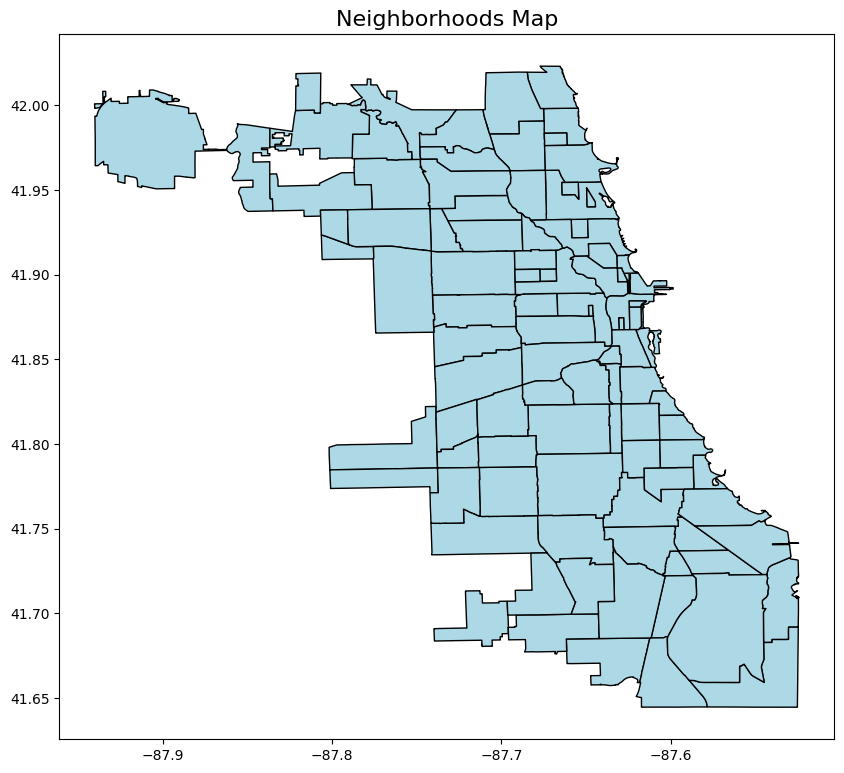

In [ ]:
# add borough to do an overall analysis
# import boundary
file_path = r"Neighborhoods_2012b.csv"
ChicagoBoundary = pd.read_csv(file_path)
ChicagoBoundary["the_geom"] = ChicagoBoundary["the_geom"].apply(wkt.loads)
ChicagoBoundary = gpd.GeoDataFrame(ChicagoBoundary, geometry="the_geom")
fig, ax = plt.subplots(figsize=(10, 10))
ChicagoBoundary.plot(ax=ax, color='lightblue', edgecolor='black')
ax.set_title("Neighborhoods Map", fontsize=16)
plt.show()

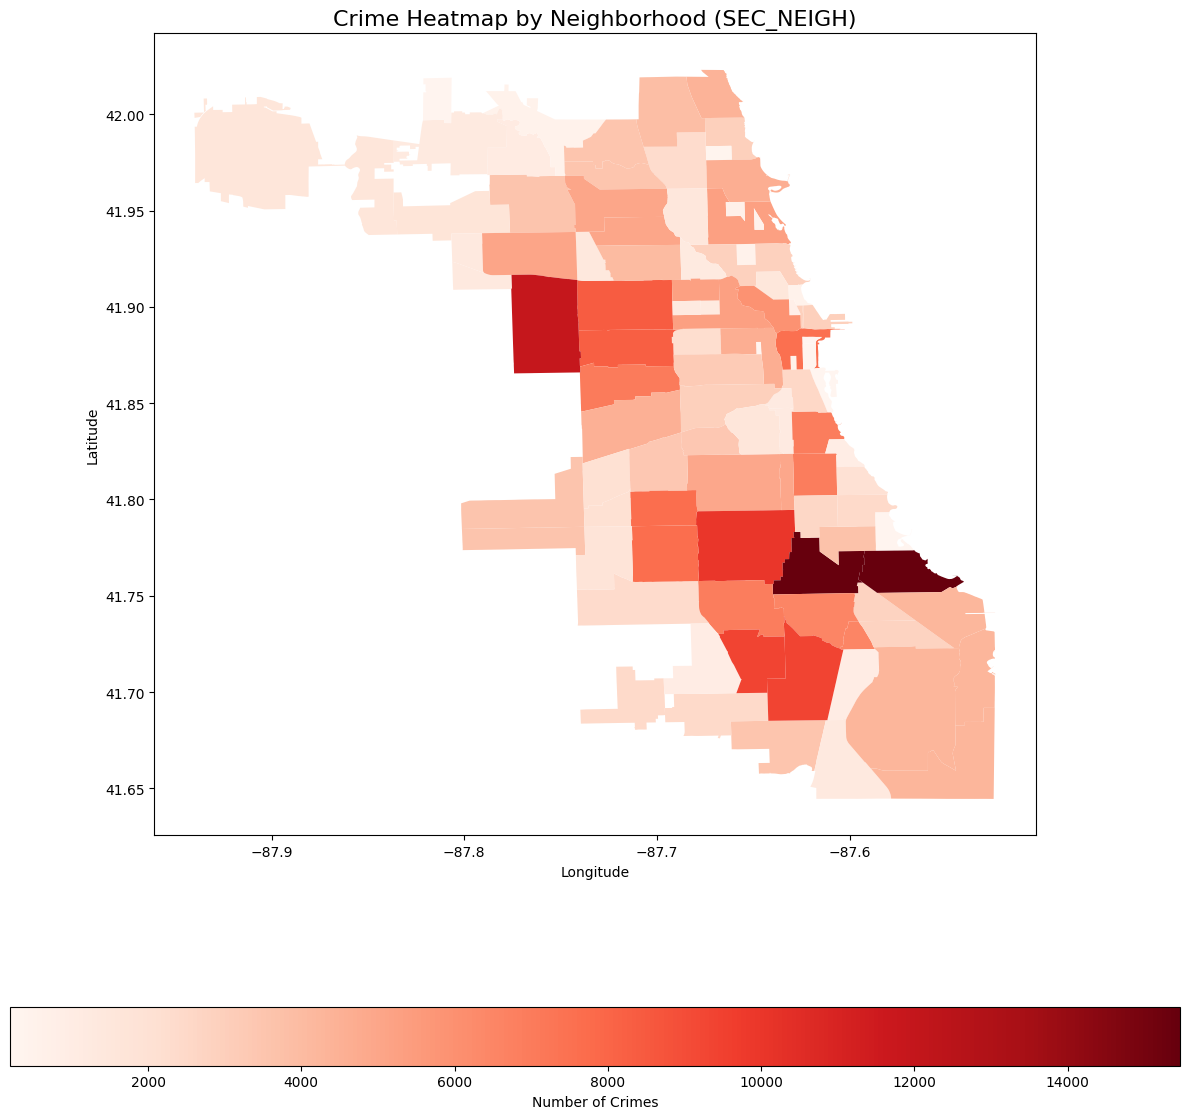

In [ ]:
#data = data.set_crs("EPSG:4326", allow_override=True)
#ChicagoBoundary = ChicagoBoundary.set_crs("EPSG:4326", allow_override=True)
# Group crime data by SEC_NEIGH and count crimes
crime_counts = data.groupby('SEC_NEIGH').size().reset_index(name='crime_count')

# Merge the crime counts with the ChicagoBoundary GeoDataFrame
merged_gdf = ChicagoBoundary.merge(crime_counts, on='SEC_NEIGH', how='left')

# Fill NaN values in 'crime_count' with 0 (for neighborhoods with no crimes)
merged_gdf['crime_count'] = merged_gdf['crime_count'].fillna(0)

# Plot the heatmap
fig, ax = plt.subplots(figsize=(12, 12))
merged_gdf.plot(
    ax=ax,
    column='crime_count',
    cmap='Reds',
    legend=True,
    legend_kwds={'label': "Number of Crimes", 'orientation': "horizontal"}
)

# Add titles and labels
ax.set_title("Crime Heatmap by Neighborhood (SEC_NEIGH)", fontsize=16)
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

# Improve layout
plt.tight_layout()
plt.show()

#### K means clustering

In [ ]:
df = pd.read_csv(file_path)
df.head()

unique_key case_number                     date                 block  \
0    13149899    JG352235  2023-07-22 23:56:00 UTC      001XX N STATE ST   
1    13273312    JG499346  2023-11-10 18:07:00 UTC  001XX N MICHIGAN AVE   
2    12977363    JG145925  2023-02-08 22:00:00 UTC     0000X E WACKER DR   
3    13052875    JG236232  2023-04-24 23:15:00 UTC       0000X E LAKE ST   
4    13250599    JG472137  2023-10-21 00:00:00 UTC      002XX N STATE ST   

   iucr primary_type              description location_description  arrest  \
0  031A      ROBBERY          ARMED - HANDGUN             SIDEWALK   False   
1  0460      BATTERY                   SIMPLE               STREET   False   
2  0460      BATTERY                   SIMPLE    CONVENIENCE STORE   False   
3  0460      BATTERY                   SIMPLE              CTA BUS   False   
4  0486      BATTERY  DOMESTIC BATTERY SIMPLE        HOTEL / MOTEL   False   

   domestic  ...                            location  season  \
0     False  ...  POINT (-87.627915459 41.884650262)  Summer   
1     False  ...  POINT (-87.624469241 41.884790951)    Fall   
2     False  ...  POINT (-87.626851797 41.886863814)  Summer   
3     False  ...  POINT (-87.627525121 41.885748304)  Summer   
4      True  ...  POINT (-87.627942238 41.885888079)    Fall   

           crime_category  index_right PRI_NEIGH  SEC_NEIGH    SHAPE_AREA  \
0  Serious_Against_Person           26      Loop       LOOP  3.148519e+07   
1  Serious_Against_Person           26      Loop       LOOP  3.148519e+07   
2  Serious_Against_Person           26      Loop       LOOP  3.148519e+07   
3  Serious_Against_Person           26      Loop       LOOP  3.148519e+07   
4  Serious_Against_Person           26      Loop       LOOP  3.148519e+07   

      SHAPE_LEN        category  location_category  
0  52640.907563  Transportation     Transportation  
1  52640.907563  Transportation     Transportation  
2  52640.907563      Commercial         Commercial  
3  52640.907563  Transportation     Transportation  
4  52640.907563         Leisure            Leisure  

[5 rows x 31 columns]

In [ ]:
# Fit the encoder to the crime_category column and transform its values into numeric labels
label_encoder = LabelEncoder()
df['crime_category'] = label_encoder.fit_transform(df['crime_category'])

# Print the mapping between numeric labels and categories
category_mapping = dict(enumerate(label_encoder.classes_))
print(category_mapping)

{0: 'Light_Against_Person', 1: 'Light_Against_Property', 2: 'Others', 3: 'Serious_Against_Person', 4: 'Serious_Against_Property'}


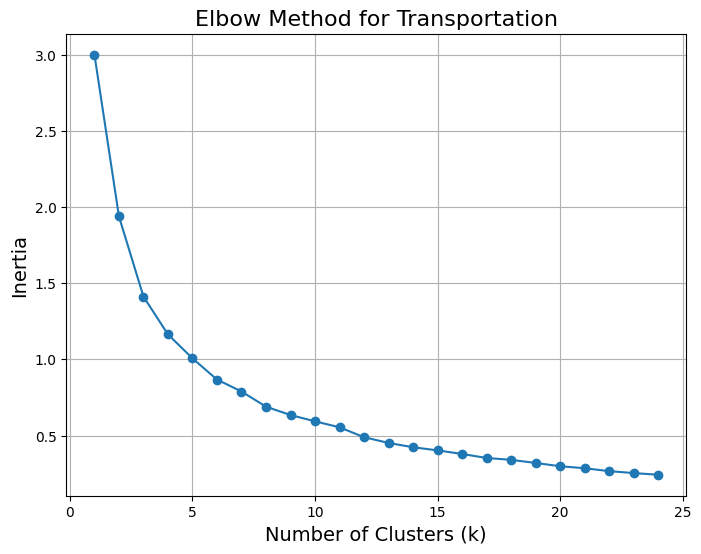

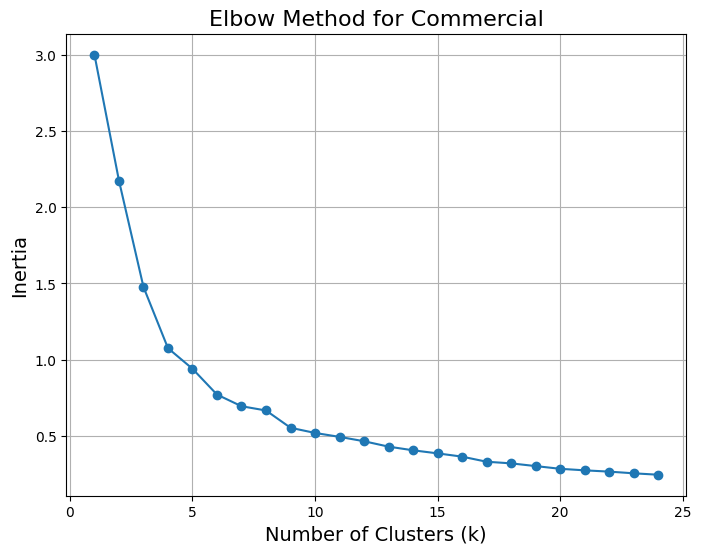

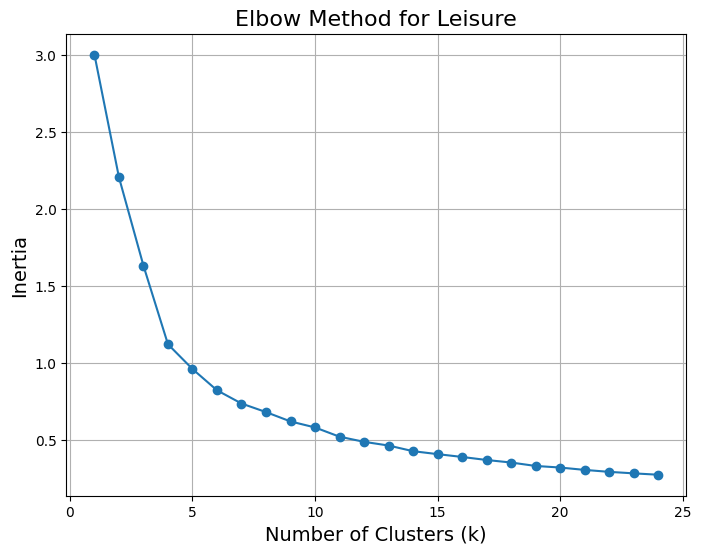

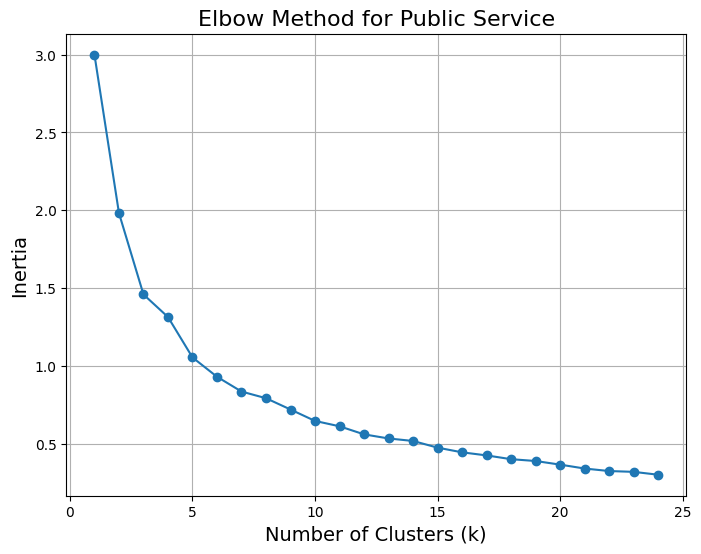

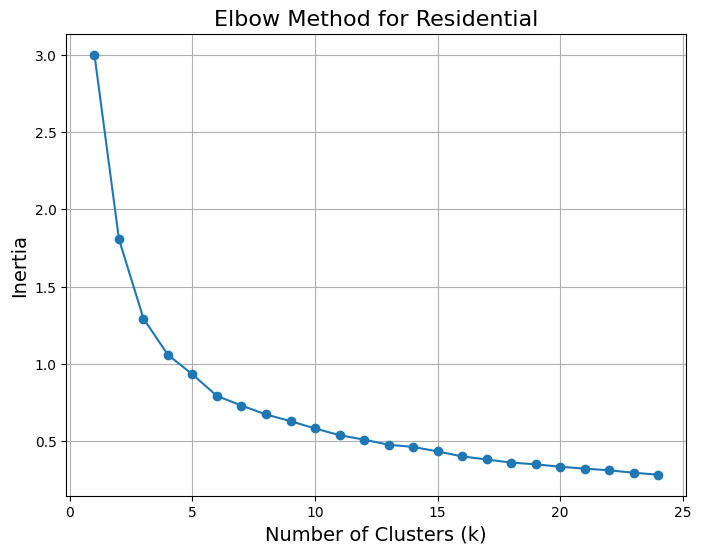

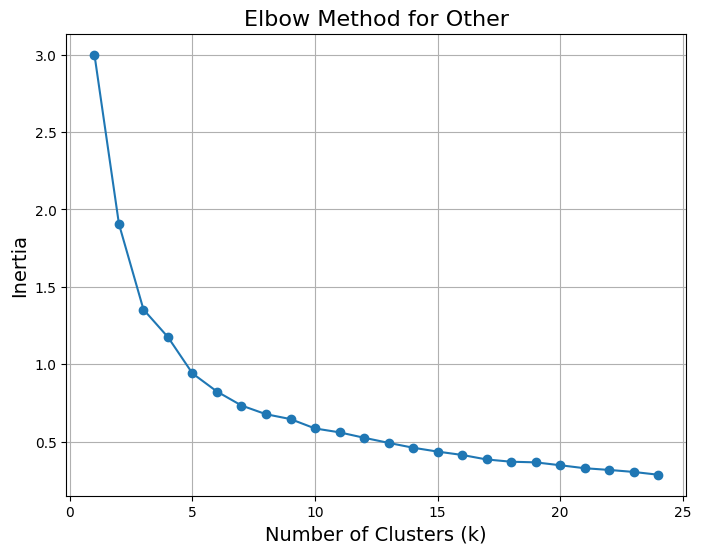

In [ ]:
# Function to plot the Elbow Method for each location category to determine the optimal number of clusters (k)

location_categories = df['category'].unique()

def plot_elbow_for_categories(df, categories_column, k_range):

    for category in location_categories:
        subdf = df[df['category'] == category]
        subdf = subdf[['latitude', 'longitude', 'crime_category']]

        standard_scaler = StandardScaler()
        subdf_scaled = standard_scaler.fit_transform(subdf)

        inertia = []
        for k in k_range:
            kmeans = KMeans(n_clusters=k, random_state=333)
            kmeans.fit(subdf_scaled)
            #inertia.append(kmeans.inertia_)
            inertia.append(kmeans.inertia_ / subdf_scaled.shape[0])

        plt.figure(figsize=(8, 6))
        plt.plot(k_range, inertia, marker='o')
        plt.title(f'Elbow Method for {category}', fontsize=16)
        plt.xlabel('Number of Clusters (k)', fontsize=14)
        plt.ylabel('Inertia', fontsize=14)
        plt.grid(True)
        plt.show()

plot_elbow_for_categories(
    df=df,
    categories_column='category',
    k_range=range(1, 25)
)
#5，4，4，5，5，5

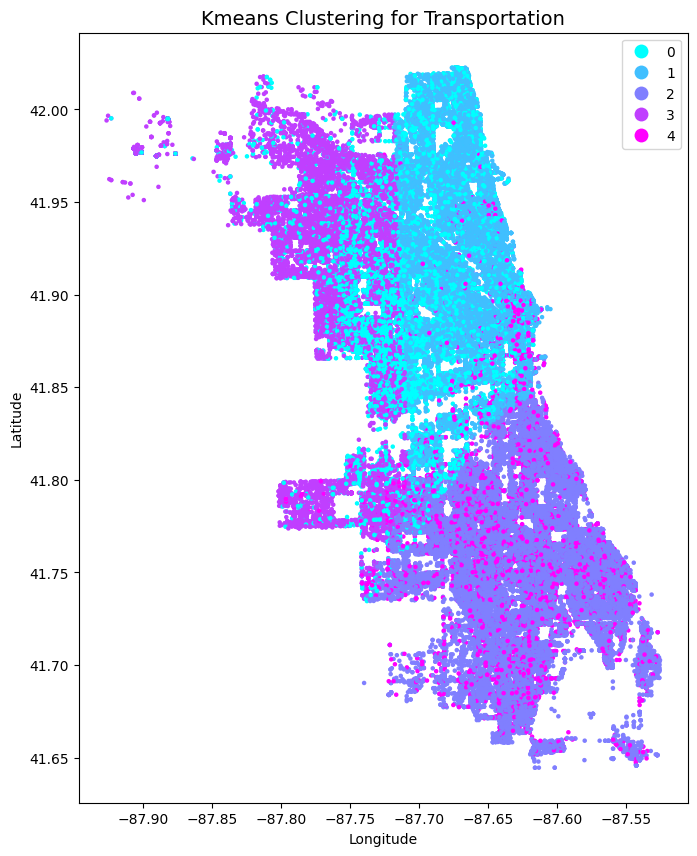

cluster_kmeans  crime_category
0               3                 16588
                2                  6948
                1                   696
                0                    24
1               4                 24355
                3                    55
2               4                 25189
                3                 10291
3               4                 14311
                3                  1638
                2                   120
4               2                  7718
                1                  2140
                0                   357
Name: count, dtype: int64


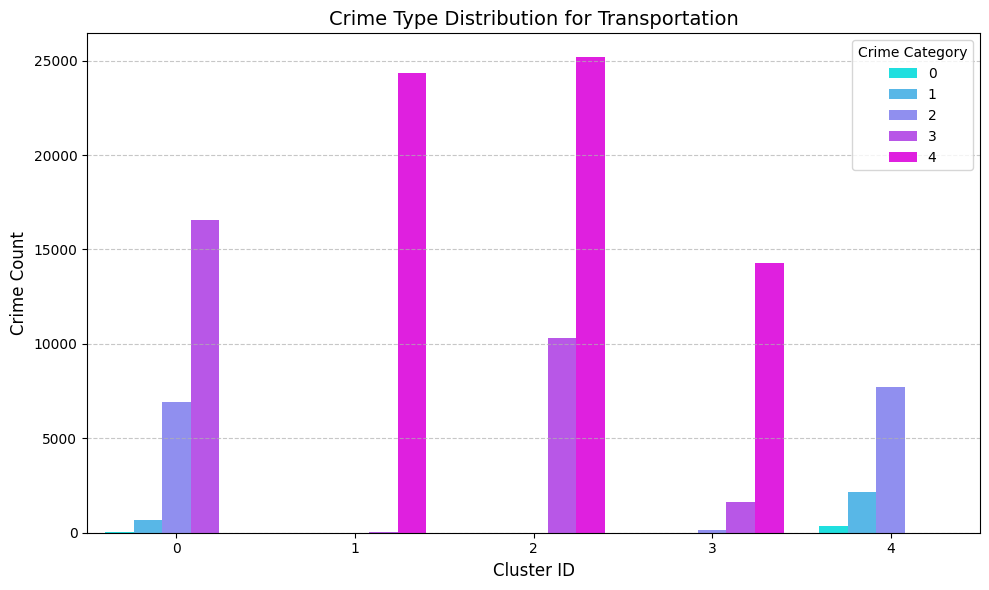

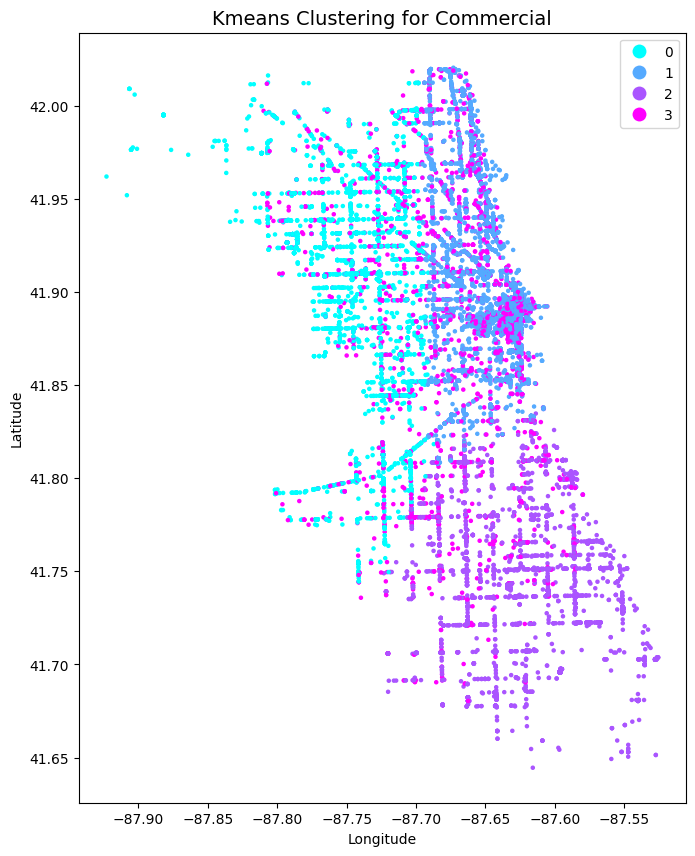

cluster_kmeans  crime_category
0               4                 3244
                3                 1326
                2                  126
                1                   30
1               4                 8156
                3                 1773
2               4                 2413
                3                 1365
                2                  205
                1                  140
3               1                 3065
                2                  585
                0                   47
Name: count, dtype: int64


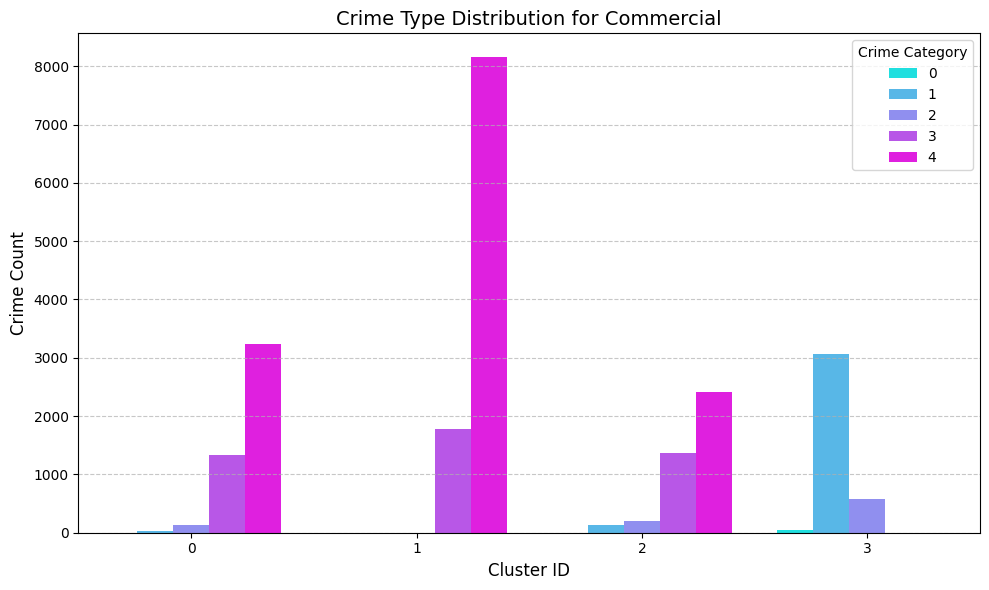

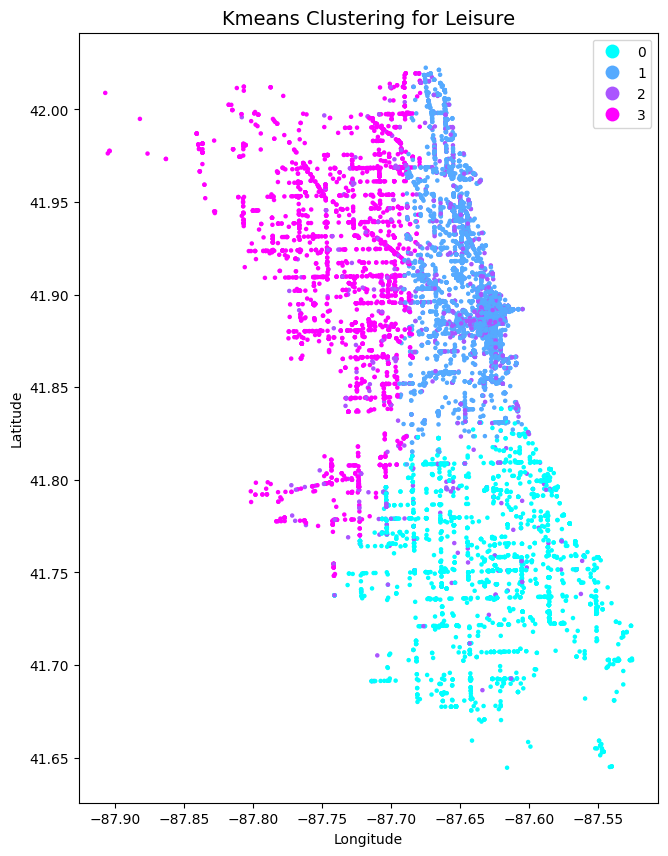

cluster_kmeans  crime_category
0               3                 1062
                4                  810
                2                  177
                1                   34
1               4                 4032
                3                 1930
2               1                 1174
                2                  410
                0                   59
3               3                 1249
                4                  955
                2                  170
                1                   23
                0                    1
Name: count, dtype: int64


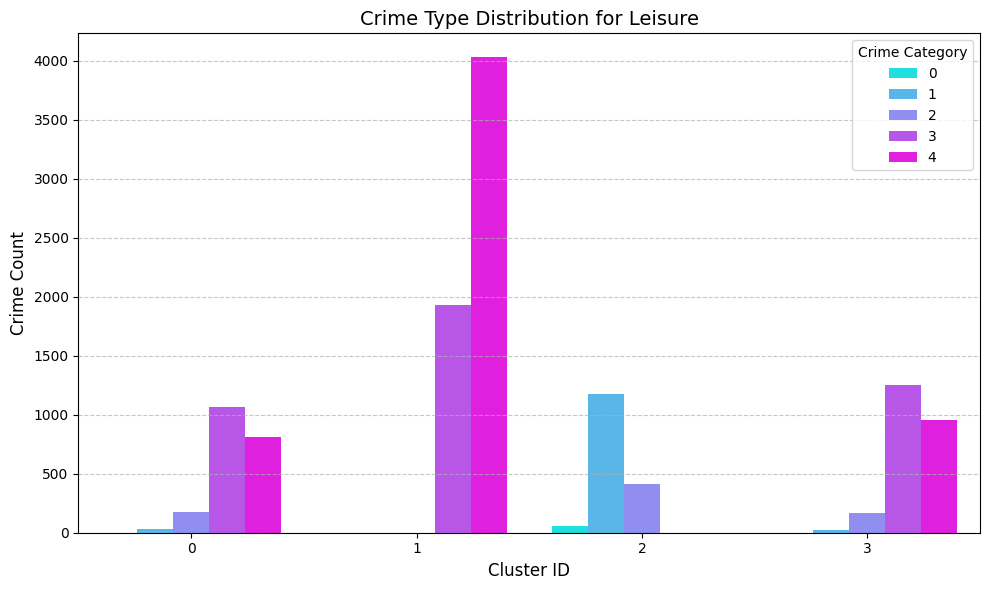

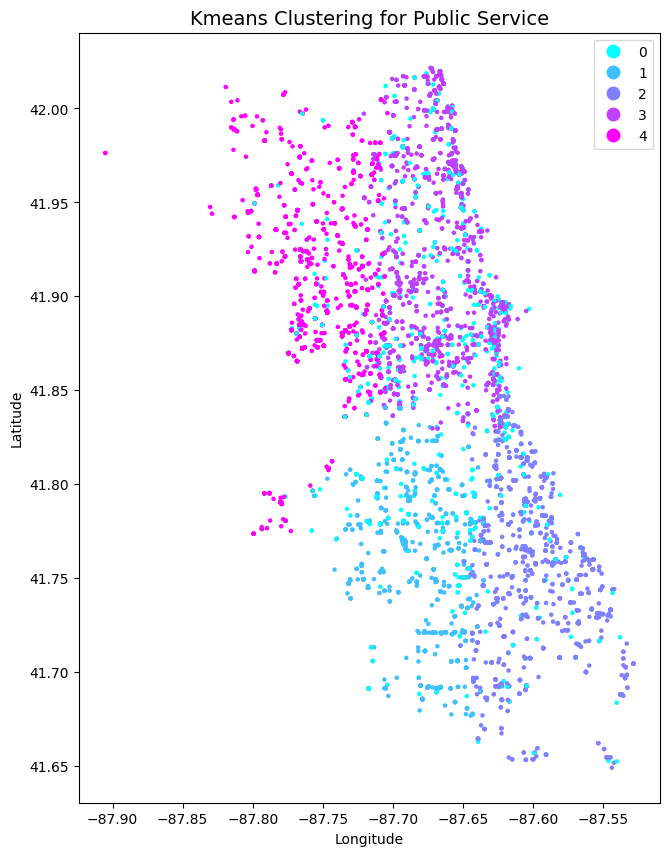

cluster_kmeans  crime_category
0               2                  664
                1                  508
                0                  203
1               3                  766
                4                  322
                2                   39
2               3                 1218
                4                  385
                2                  235
                1                   18
3               3                 1667
                4                  966
4               3                 1063
                4                  220
                2                  160
                1                    4
Name: count, dtype: int64


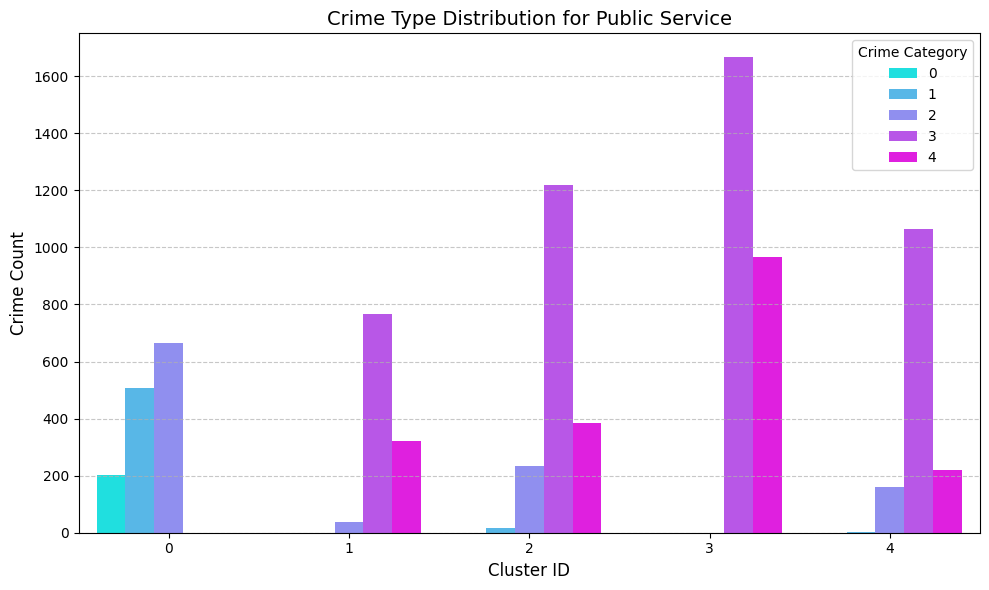

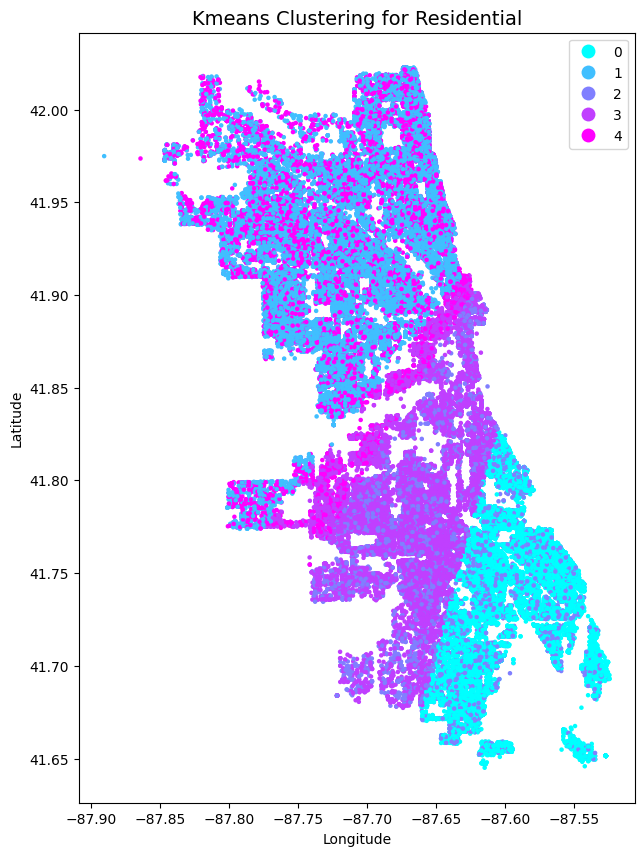

cluster_kmeans  crime_category
0               3                 10085
                4                  9054
                2                   200
1               4                 14651
                3                 13949
2               2                  5509
                1                  4433
                0                   974
3               3                 10452
                4                  9120
4               1                  6590
                2                  5149
                0                   860
Name: count, dtype: int64


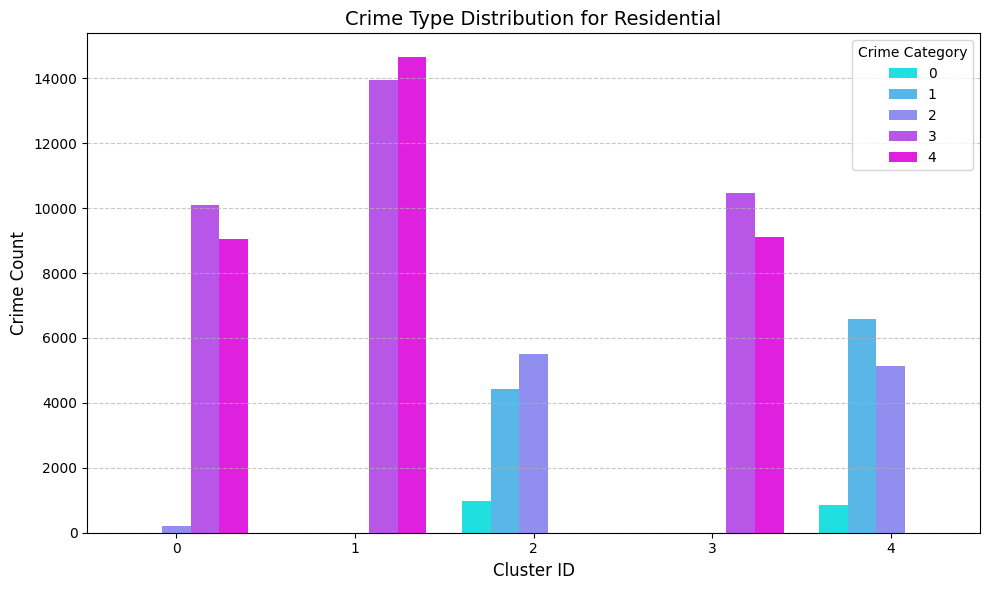

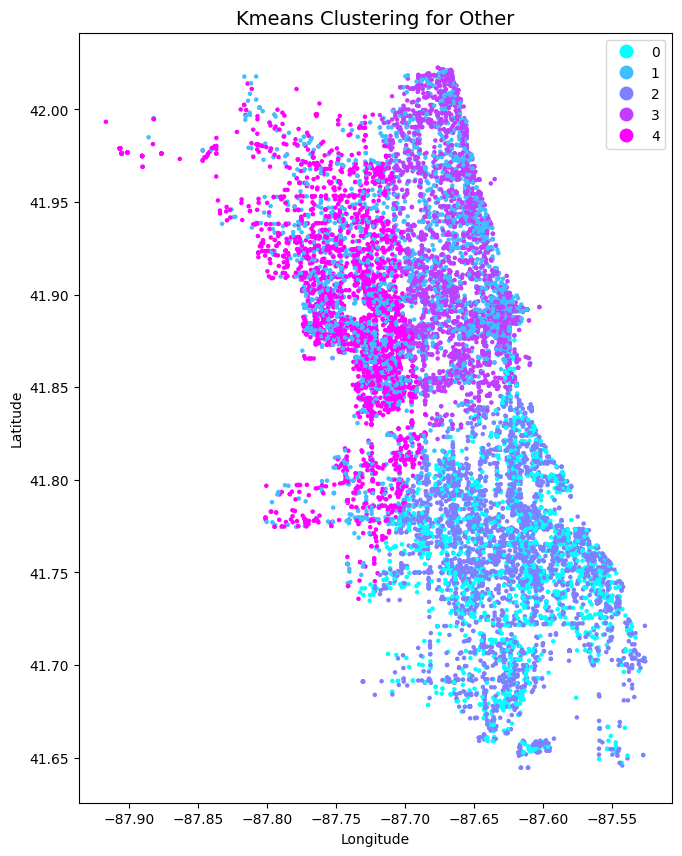

cluster_kmeans  crime_category
0               2                 1344
                1                  815
                0                   16
1               1                 1885
                2                 1631
                0                   41
2               4                 2253
                3                 1993
3               4                 2133
                3                 1108
4               4                 1678
                3                 1636
                2                   51
Name: count, dtype: int64


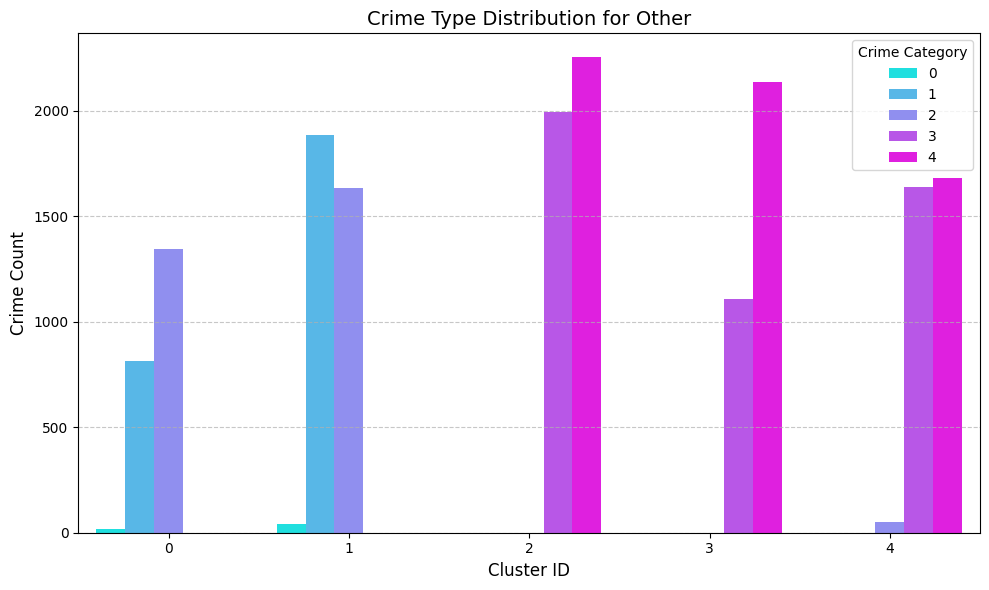

In [ ]:
location_categories = df['category'].unique()

category_k_values = {
    "Transportation": 5,
    "Commercial": 4,
    "Leisure": 4,
    "Public Service": 5,
    "Residential": 5,
    "Other": 5
}

for category in location_categories:
    subdf = df[df['category'] == category]
    subdf = subdf[['latitude', 'longitude', 'crime_category']]

    standard_scaler = StandardScaler()
    subdf_scaled = standard_scaler.fit_transform(subdf)

    # Perform KMeans clustering based on latitude, longitude, and crime_category
    subdf_kmeans = subdf_scaled
    optimal_k = category_k_values[category]
    kmeans = KMeans(n_clusters=optimal_k, random_state=333)
    sub_kmeans = kmeans.fit(subdf_kmeans)
    subdf['cluster_kmeans'] = sub_kmeans.predict(subdf_kmeans)
    subdf['cluster_kmeans'] = subdf['cluster_kmeans'].astype(str)

    sub_gdf = gpd.GeoDataFrame(
        subdf,
        geometry=gpd.points_from_xy(subdf['longitude'], subdf['latitude']),
        crs="EPSG:4326"
    )

    # Plot geographical clustering map for the current category
    fig, ax = plt.subplots(1, 1, figsize=(20, 10))
    sub_gdf.plot(
        column='cluster_kmeans',
        cmap='cool',
        legend=True,
        ax=ax,
        markersize=5
    )
    plt.title(f'Kmeans Clustering for {category}', fontsize=14)
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.show()

    # Print cluster-wise crime category distribution
    category_summary = subdf.groupby('cluster_kmeans')['crime_category'].value_counts()
    print(category_summary)

    # Plot bar chart showing the distribution of crime categories within each cluster
    category_summary_df = subdf.groupby('cluster_kmeans')['crime_category'].value_counts().reset_index()
    category_summary_df.columns = ['cluster_kmeans', 'crime_category', 'count']

    plt.figure(figsize=(10, 6))
    sns.barplot(
        data=category_summary_df,
        x='cluster_kmeans',
        y='count',
        hue='crime_category',
        palette='cool'
    )

    plt.title(f'Crime Type Distribution for {category}', fontsize=14)
    plt.xlabel('Cluster ID', fontsize=12)
    plt.ylabel('Crime Count', fontsize=12)
    plt.legend(title='Crime Category', loc='upper right', fontsize=10)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


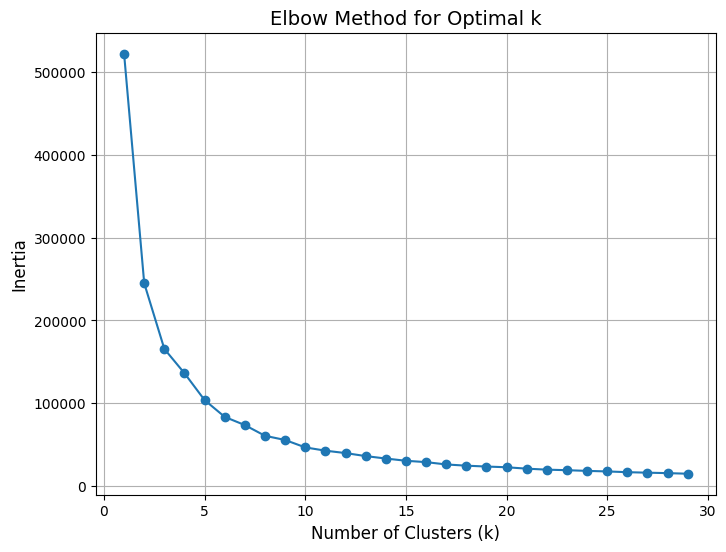

In [ ]:
# Plot the Elbow Method to determine the optimal number of clusters (k)
region_df = df[['latitude', 'longitude', 'category', 'crime_category']]

scaler = StandardScaler()
region_scaled = scaler.fit_transform(region_df[['latitude', 'longitude']])

k_range = range(1, 30)
inertia = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=333)
    kmeans.fit(region_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal k', fontsize=14)
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('Inertia', fontsize=12)
plt.grid(True)
plt.show()

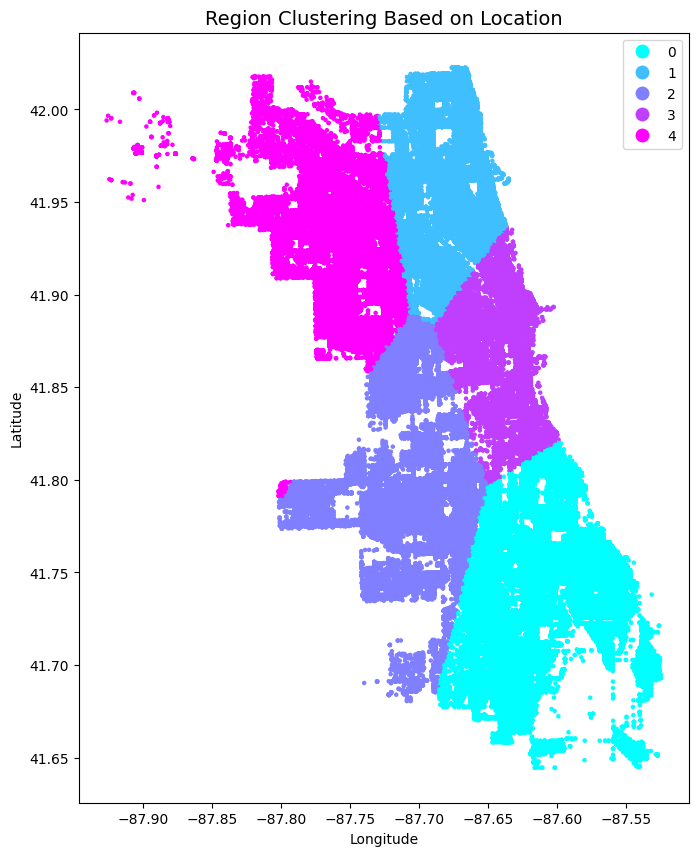

In [ ]:
# Perform clustering on geographic locations based on latitude and longitude
# Plot the geographical distribution of clusters after KMeans clustering
region_df_kmeans = region_scaled
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=333)
region_kmeans = kmeans.fit(region_df_kmeans)
df['region_cluster'] = region_kmeans.predict(region_df_kmeans)
df['region_cluster'] = df['region_cluster'].astype(str)


gdf = gpd.GeoDataFrame(
    df,
    geometry=gpd.points_from_xy(region_df['longitude'], region_df['latitude']),
    crs="EPSG:4326"
)

fig, ax = plt.subplots(1, 1, figsize=(20, 10))
gdf.plot(
    column='region_cluster',
    cmap='cool',
    legend=True,
    ax=ax,
    markersize=5
)
plt.title('Region Clustering Based on Location', fontsize=14)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [ ]:
# Summarize the count of each crime_category within each region_cluster and category
region_summary = df.groupby(['region_cluster', 'category'])['crime_category'].value_counts()

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

print(region_summary)

region_cluster  category        crime_category
0               Commercial      4                  1866
                                3                   965
                                1                   492
                                2                   193
                                0                     9
                Leisure         3                   723
                                4                   621
                                2                   151
                                1                   110
                                0                    12
                Other           4                  1704
                                3                  1398
                                2                  1004
                                1                   595
                                0                    12
                Public Service  3                  1303
                                4                   504
 

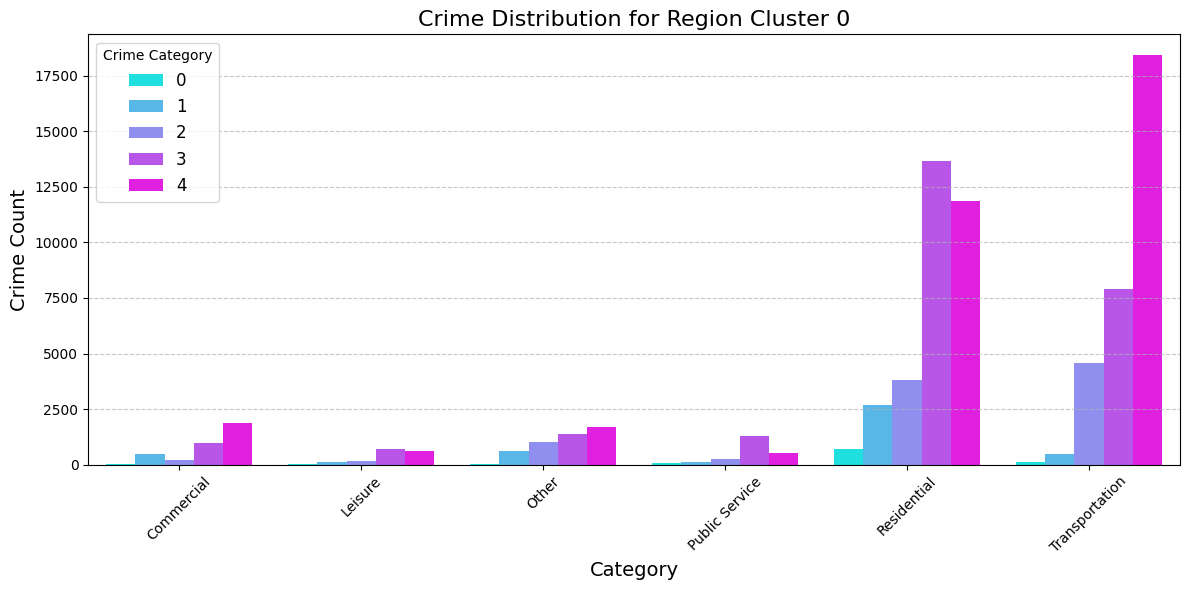

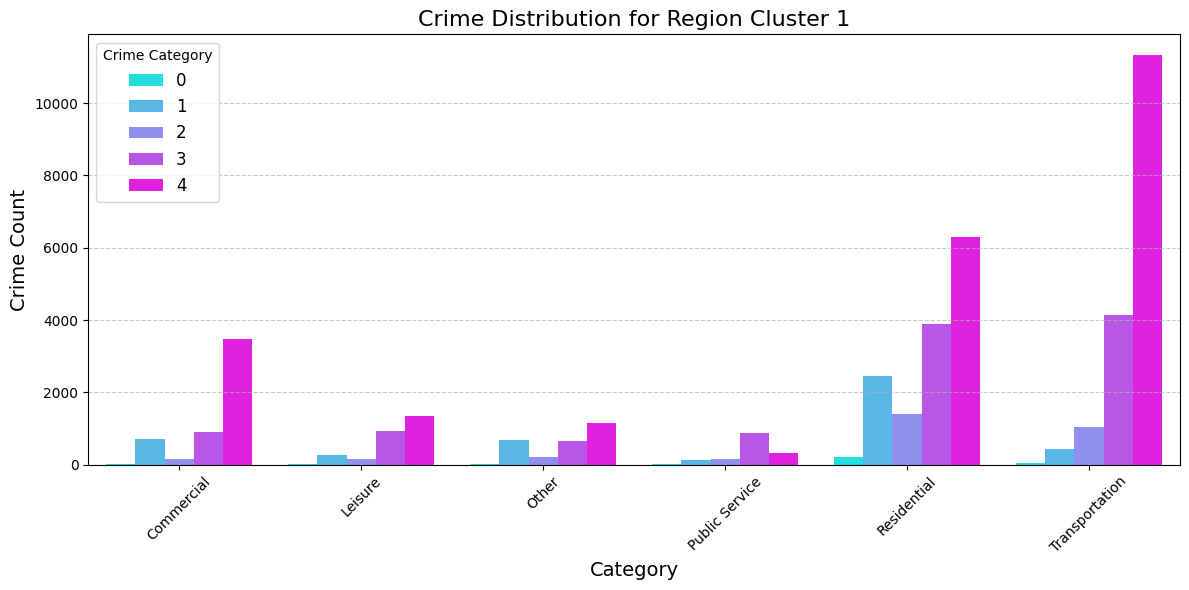

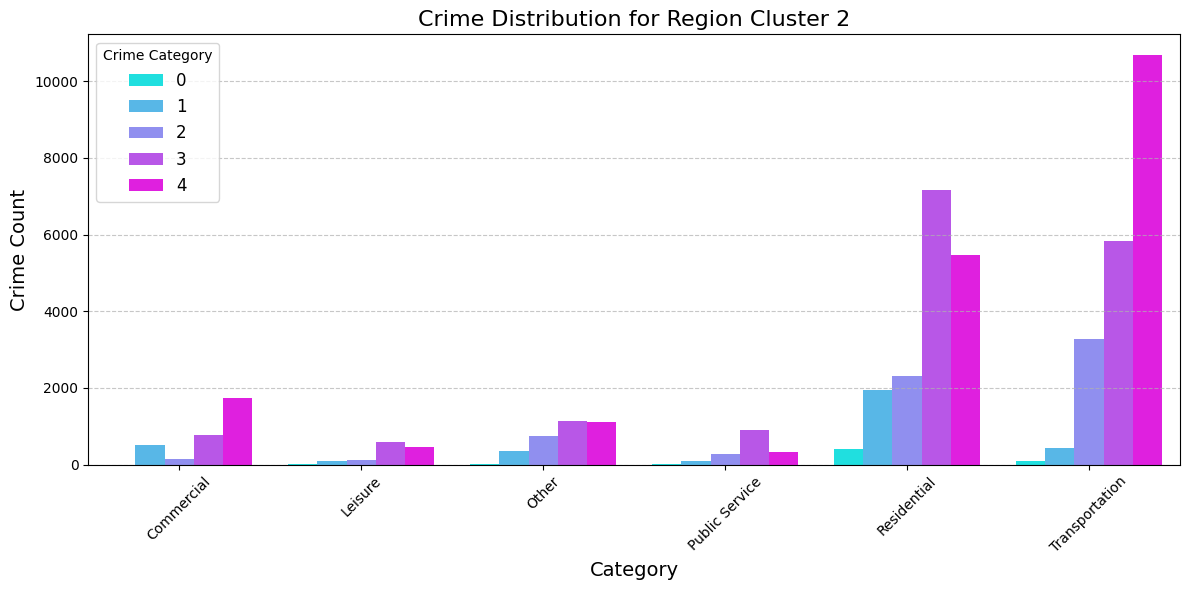

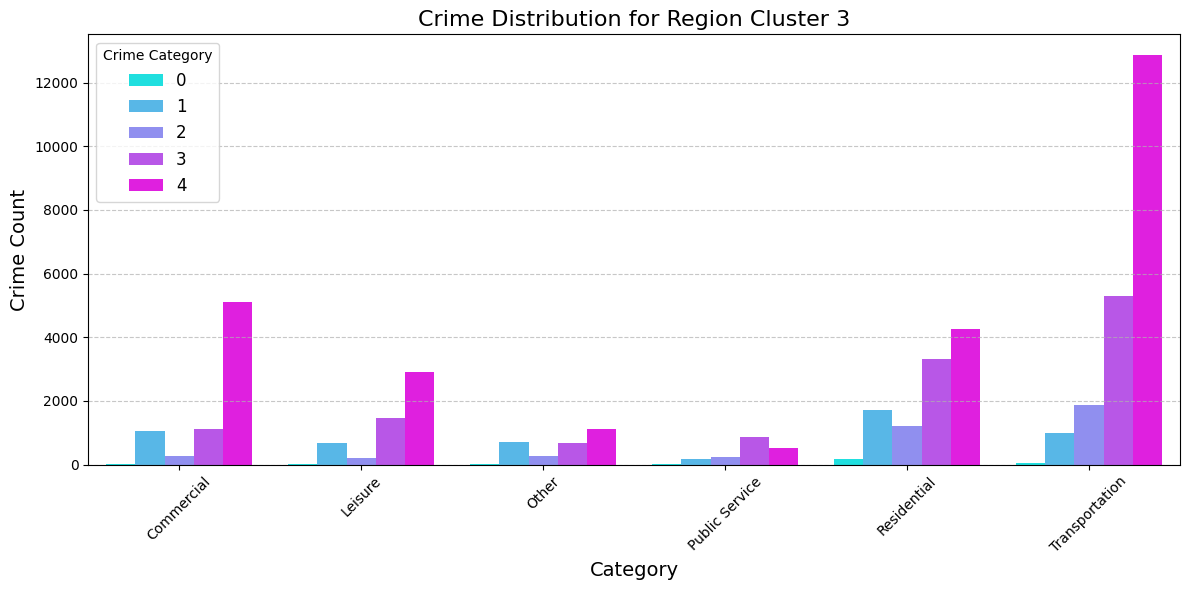

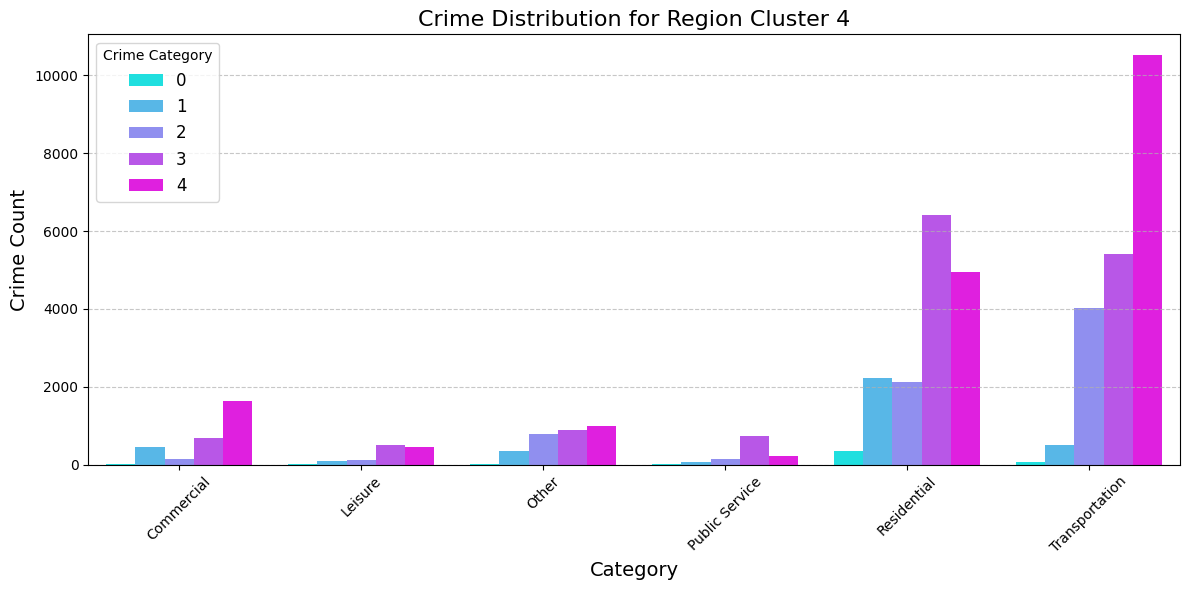

In [ ]:
# Plot bar chart showing the distribution of crime categories within each region cluster across different location categories

region_summary_df = region_summary.reset_index()
region_summary_df.columns = ['region_cluster', 'category', 'crime_category', 'count']

clusters = region_summary_df['region_cluster'].unique()
for cluster in clusters:
    cluster_data = region_summary_df[region_summary_df['region_cluster'] == cluster]

    plt.figure(figsize=(12, 6))

    sns.barplot(
        data=cluster_data,
        x='category',
        y='count',
        hue='crime_category',
        palette='cool'
    )

    plt.title(f'Crime Distribution for Region Cluster {cluster}', fontsize=16)
    plt.xlabel('Category', fontsize=14)
    plt.ylabel('Crime Count', fontsize=14)
    plt.legend(title='Crime Category', fontsize=12)
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

### Time analysis

#### Time Series Analysis of Entries Over Time

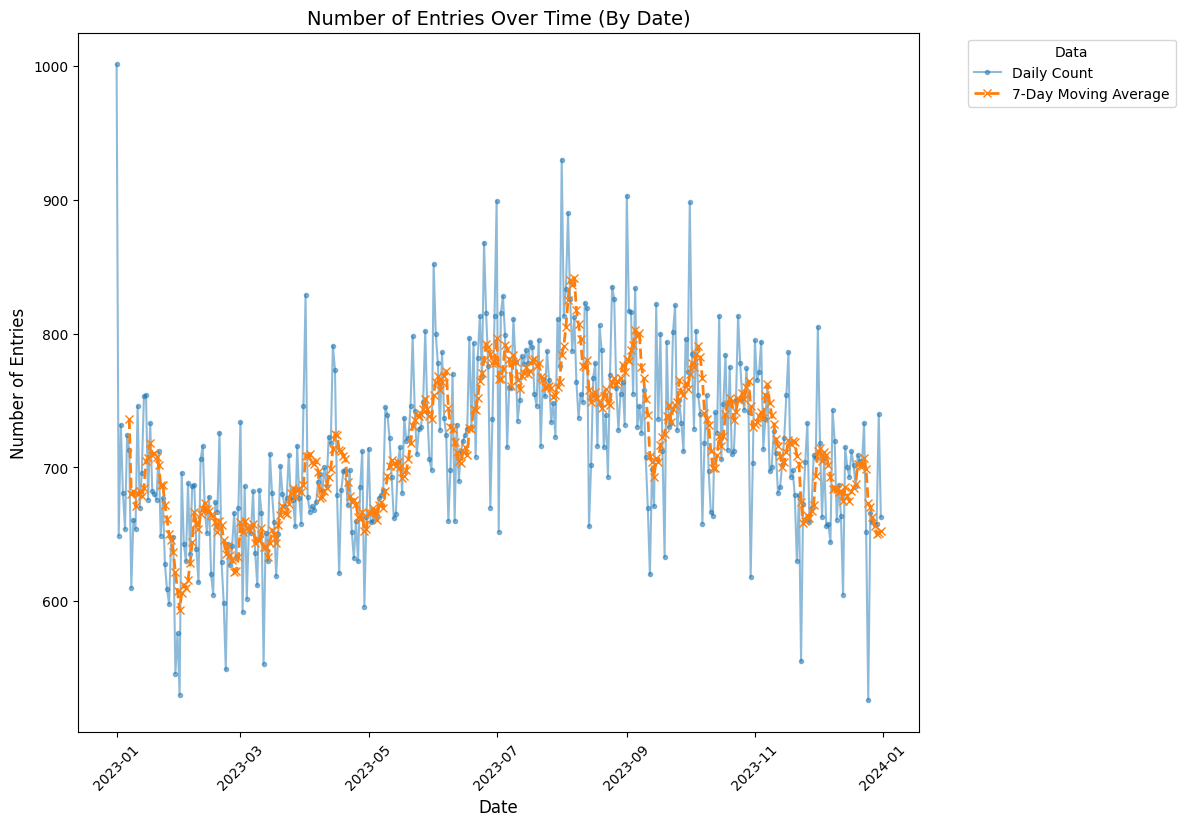

In [ ]:
data['date'] = pd.to_datetime(data['date'], errors='coerce')

daily_counts = data.groupby(data['date'].dt.date).size()

smoothed_counts = daily_counts.rolling(window=7).mean()

plt.figure(figsize=(12, 8))
daily_counts.plot(kind='line', marker='.', alpha=0.5, label='Daily Count')
smoothed_counts.plot(kind='line', marker='x', linewidth=2, linestyle='--', label='7-Day Moving Average')

plt.title('Number of Entries Over Time (By Date)', fontsize=14)
plt.ylabel('Number of Entries', fontsize=12)
plt.xlabel('Date', fontsize=12)
plt.legend(title='Data', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

#### Number of Each Location Category Over Time

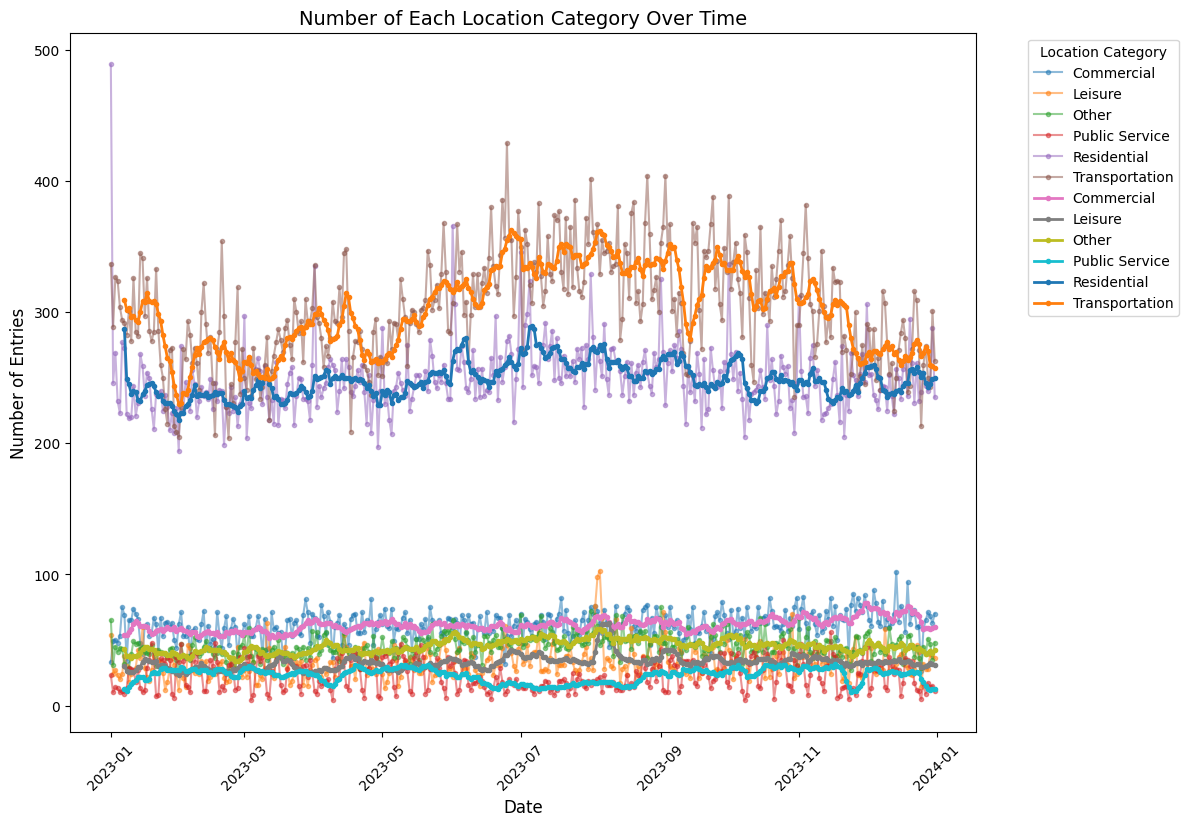

In [ ]:
grouped = data.groupby([data['date'].dt.date, 'location_category']).size().unstack(fill_value=0)


smoothed_grouped = grouped.rolling(window=7).mean()


plt.figure(figsize=(12, 8))

grouped.plot(kind='line', marker='.', alpha=0.5, ax=plt.gca())
smoothed_grouped.plot(kind='line', marker='.', linewidth=2, ax=plt.gca())


plt.title('Number of Each Location Category Over Time', fontsize=14)
plt.ylabel('Number of Entries', fontsize=12)
plt.xlabel('Date', fontsize=12)
plt.legend(title='Location Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

#### Normalized Number of Each Location Category Over Time

<Figure size 1200x800 with 0 Axes>

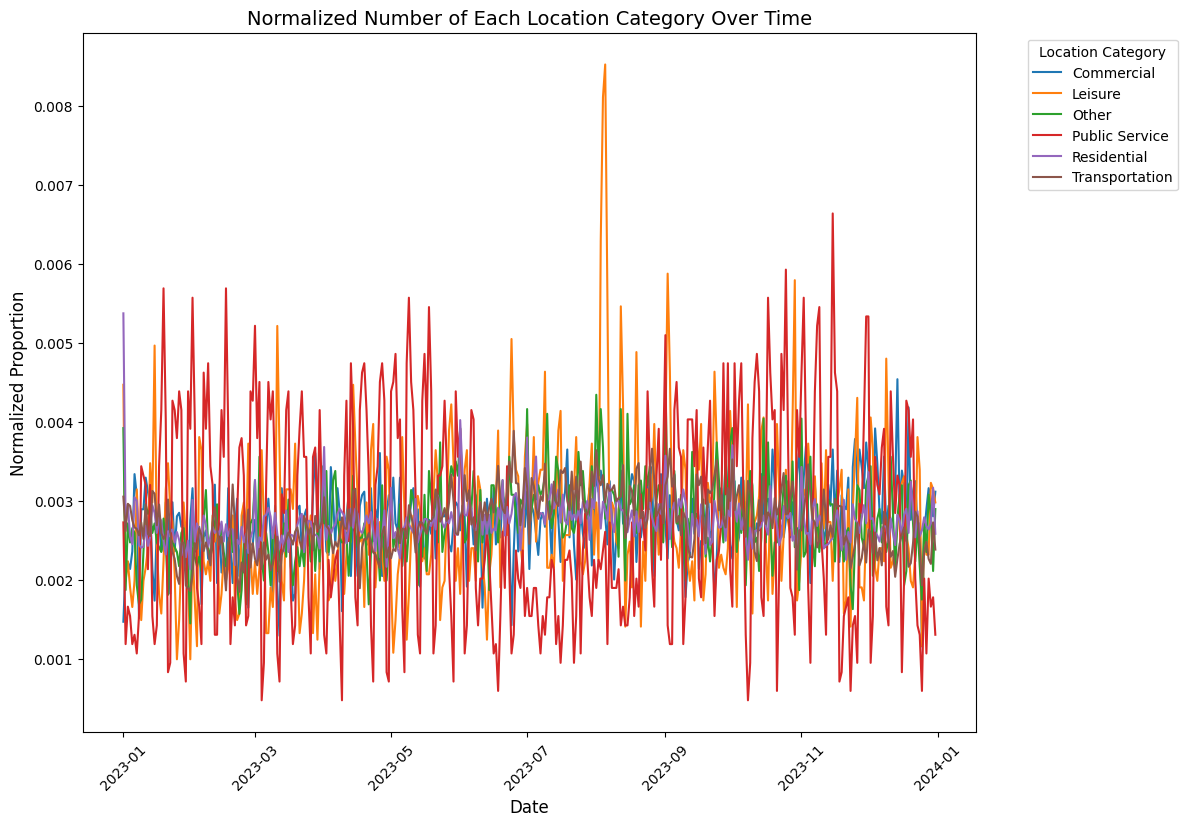

In [ ]:
normalized_grouped = grouped.div(grouped.sum(axis=0), axis=1)

plt.figure(figsize=(12, 8))
normalized_grouped.plot(kind='line', figsize=(12, 8))

plt.title('Normalized Number of Each Location Category Over Time', fontsize=14)
plt.ylabel('Normalized Proportion', fontsize=12)
plt.xlabel('Date', fontsize=12)
plt.legend(title='Location Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

#### Monthly Trends of Entries by Location Category

<Axes: xlabel='month'>

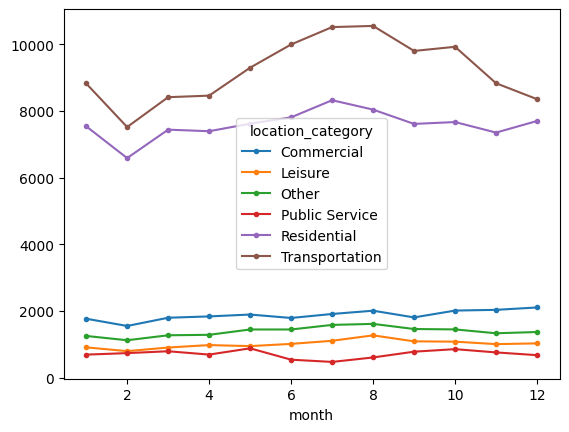

In [ ]:
data['month'] = data['date'].dt.month
monthly_grouped = data.groupby([data['month'], 'location_category']).size().unstack(fill_value=0)
monthly_grouped.plot(kind='line', marker='.')


#### simulation

In [ ]:
!pip install statsmodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 41.1 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


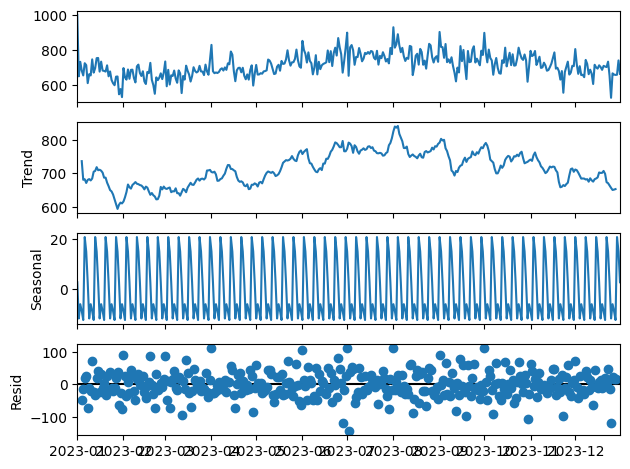

In [ ]:
# decompose
from statsmodels.tsa.seasonal import seasonal_decompose
daily_counts = grouped.sum(axis=1)
ts = daily_counts

decomposition = seasonal_decompose(ts, model='additive', period=7)
decomposition.plot()
plt.show()


In [ ]:
# Filter the data to include only events that occurred in Residential areas
residential_data = data[data['location_category'] == 'Residential']

# Filter the data to include only events that occurred in Commercial areas
commercial_data = data[data['location_category'] == 'Commercial']

# Group the Residential data by date (only the date part, ignoring time) and count the number of events for each day
residential_counts = residential_data.groupby(residential_data['date'].dt.date).size()

# Group the Commercial data by date (only the date part, ignoring time) and count the number of events for each day
commercial_counts = commercial_data.groupby(commercial_data['date'].dt.date).size()


In [ ]:
residential_counts = residential_counts.sort_index()
commercial_counts = commercial_counts.sort_index()


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Ver

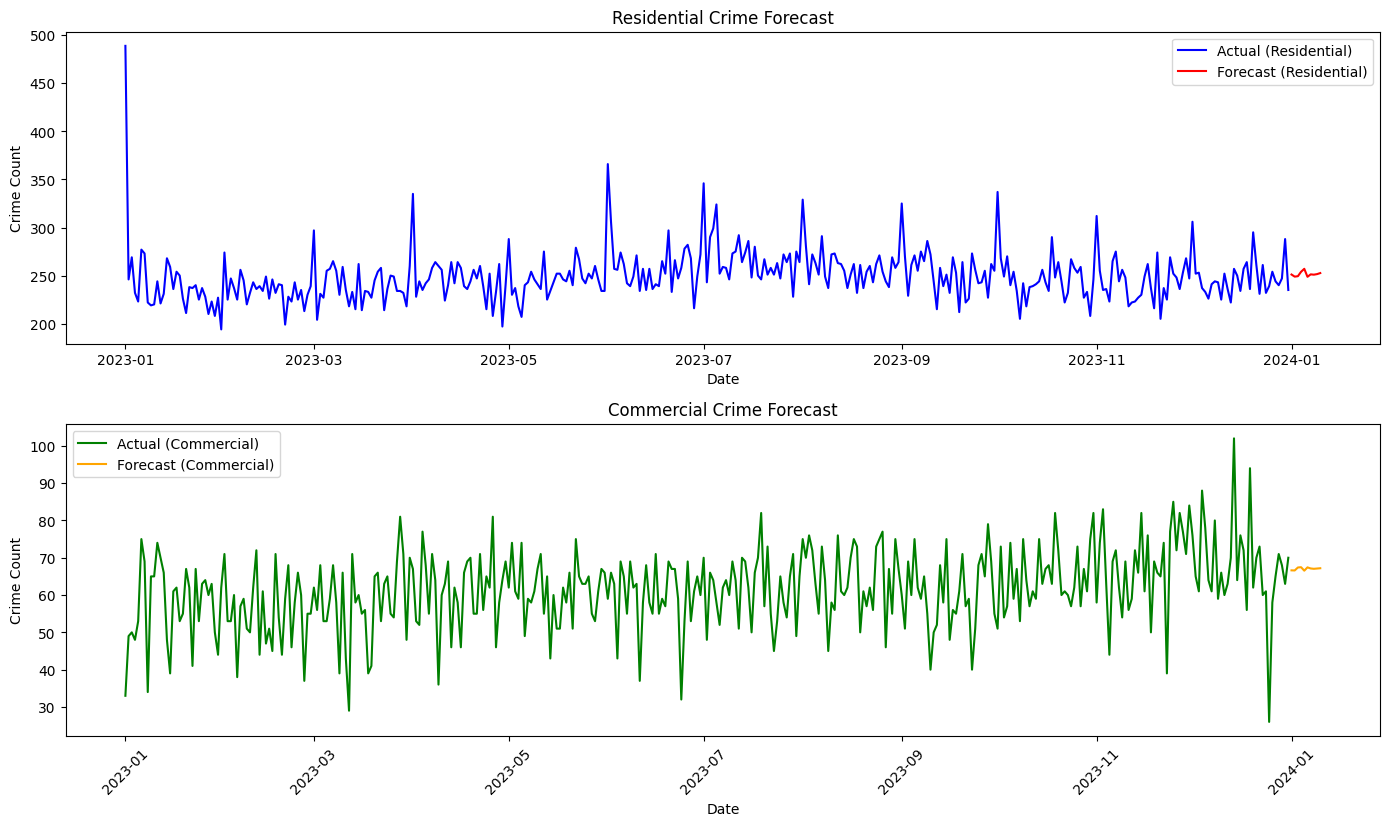

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
model_residential = ARIMA(residential_counts, order=(5, 1, 0))
model_residential_fit = model_residential.fit()
forecast_residential = model_residential_fit.forecast(steps=10)

forecast_dates_residential = pd.date_range(start=residential_counts.index[-1], periods=11, freq='D')[1:]

model_commercial = ARIMA(commercial_counts, order=(5, 1, 0))
model_commercial_fit = model_commercial.fit()
forecast_commercial = model_commercial_fit.forecast(steps=10)

forecast_dates_commercial = pd.date_range(start=commercial_counts.index[-1], periods=11, freq='D')[1:]

plt.figure(figsize=(14, 8))

plt.subplot(2, 1, 1)
plt.plot(residential_counts.index, residential_counts, label='Actual (Residential)', color='blue')
plt.plot(forecast_dates_residential, forecast_residential, label='Forecast (Residential)', color='red')
plt.title('Residential Crime Forecast')
plt.xlabel('Date')
plt.ylabel('Crime Count')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(commercial_counts.index, commercial_counts, label='Actual (Commercial)', color='green')
plt.plot(forecast_dates_commercial, forecast_commercial, label='Forecast (Commercial)', color='orange')
plt.title('Commercial Crime Forecast')
plt.xlabel('Date')
plt.ylabel('Crime Count')
plt.legend()

plt.tight_layout()
plt.xticks(rotation=45)
plt.show()


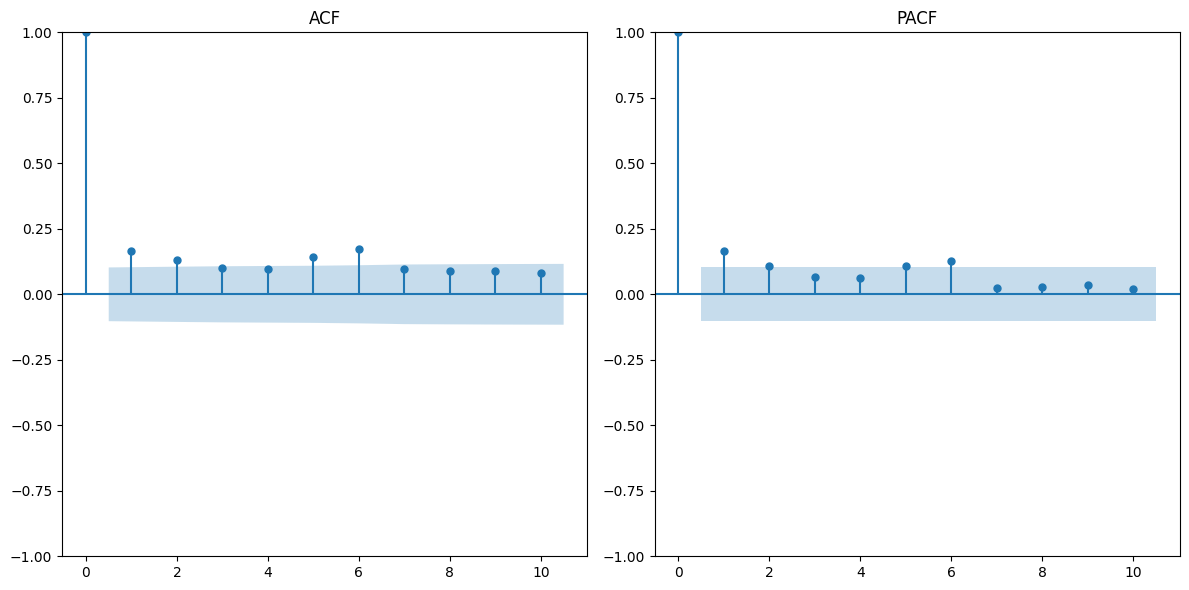

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(12, 6))

plt.subplot(121)
plot_acf(residential_counts, lags=10, ax=plt.gca())
plt.title('ACF')

plt.subplot(122)
plot_pacf(residential_counts, lags=10, ax=plt.gca())
plt.title('PACF')

plt.tight_layout()
plt.show()


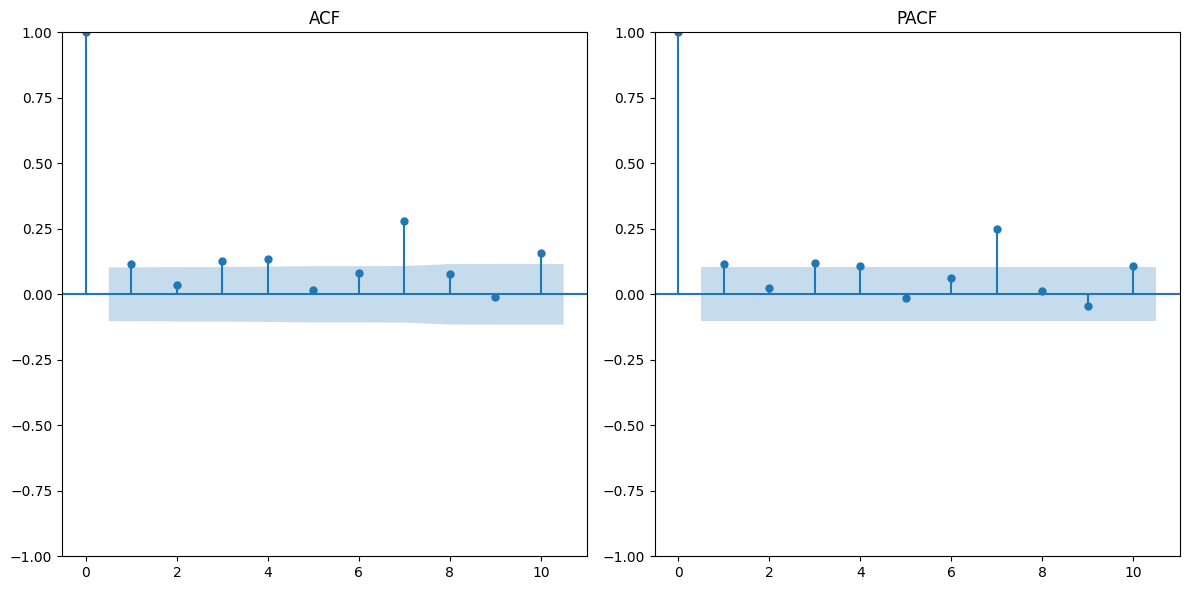

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(121)
plot_acf(commercial_counts, lags=10, ax=plt.gca())
plt.title('ACF')

plt.subplot(122)
plot_pacf(commercial_counts, lags=10, ax=plt.gca())
plt.title('PACF')

plt.tight_layout()
plt.show()


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           29     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.63359D+00    |proj g|=  1.31735D-01


 This problem is unconstrained.



At iterate    5    f=  4.59758D+00    |proj g|=  1.97729D-02

At iterate   10    f=  4.58859D+00    |proj g|=  2.14916D-02

At iterate   15    f=  4.58204D+00    |proj g|=  2.99047D-02

At iterate   20    f=  4.56252D+00    |proj g|=  4.87869D-02

At iterate   25    f=  4.55517D+00    |proj g|=  2.53926D-02

At iterate   30    f=  4.54353D+00    |proj g|=  4.42171D-02

At iterate   35    f=  4.53437D+00    |proj g|=  7.13655D-02

At iterate   40    f=  4.53102D+00    |proj g|=  2.58884D-02

At iterate   45    f=  4.52725D+00    |proj g|=  1.41476D-02

At iterate   50    f=  4.52706D+00    |proj g|=  1.82147D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting a

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           21     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.99745D+00    |proj g|=  5.13421D-01

At iterate    5    f=  3.70547D+00    |proj g|=  2.73329D-02

At iterate   10    f=  3.66775D+00    |proj g|=  5.99091D-02

At iterate   15    f=  3.63318D+00    |proj g|=  2.77750D-02

At iterate   20    f=  3.61536D+00    |proj g|=  3.67699D-02

At iterate   25    f=  3.61149D+00    |proj g|=  1.97197D-02

At iterate   30    f=  3.60801D+00    |proj g|=  7.05475D-02

At iterate   35    f=  3.60452D+00    |proj g|=  1.76958D-01

At iterate   40    f=  3.60343D+00    |proj g|=  7.14503D-02

At iterate   45    f=  3.59949D+00    |proj g|=  3.01839D-01


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



At iterate   50    f=  3.59403D+00    |proj g|=  4.12744D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   21     50     64      1     0     0   4.127D-02   3.594D+00
  F =   3.5940338613320968     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


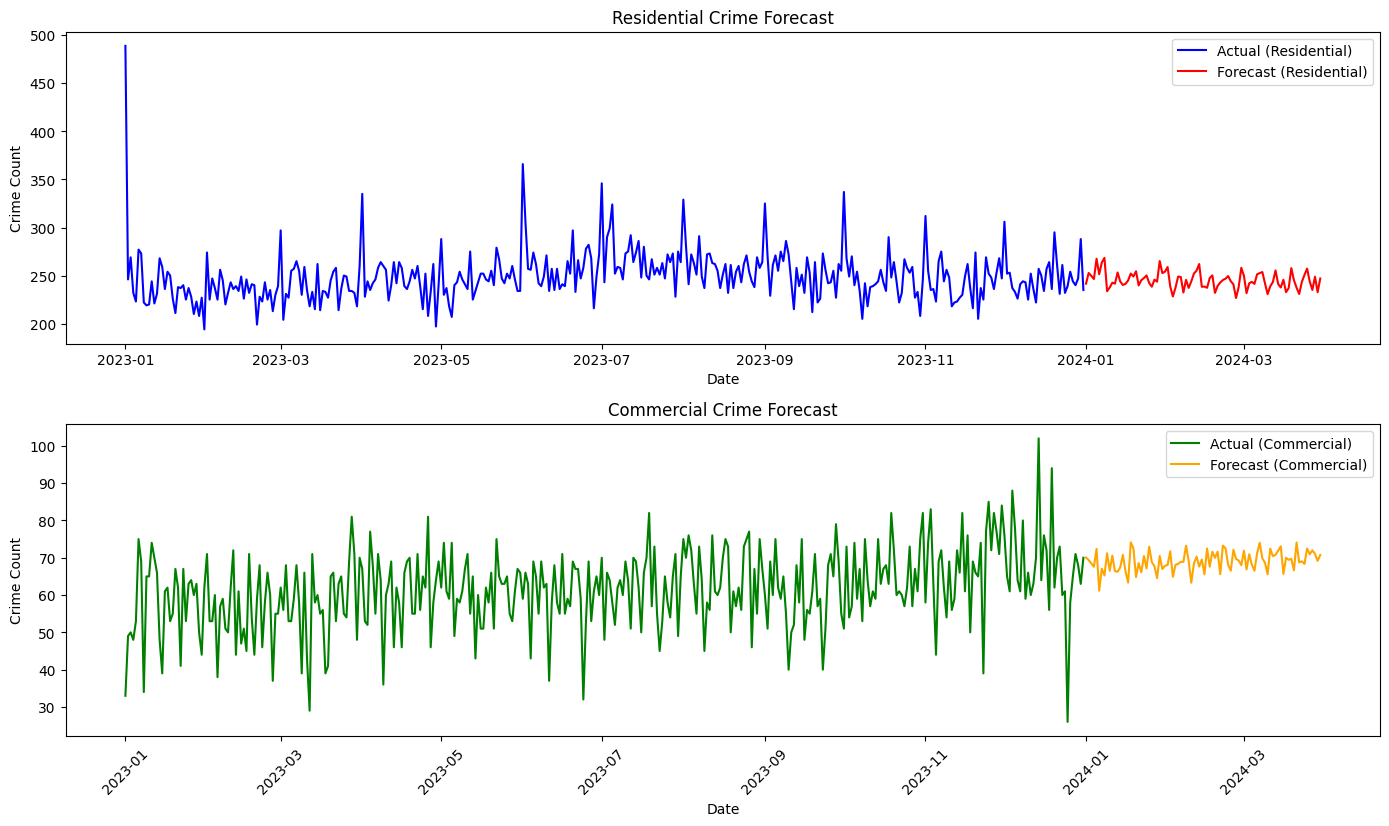

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model_residential = SARIMAX(residential_counts, order=(7, 1, 7), seasonal_order=(7, 1, 7, 12))
model_residential_fit = model_residential.fit()
forecast_residential = model_residential_fit.forecast(steps=90)

forecast_dates_residential = pd.date_range(start=residential_counts.index[-1], periods=91, freq='D')[1:]

model_commercial = SARIMAX(commercial_counts, order=(5, 1, 5), seasonal_order=(5, 1, 5, 12))
model_commercial_fit = model_commercial.fit()
forecast_commercial = model_commercial_fit.forecast(steps=90)

forecast_dates_commercial = pd.date_range(start=commercial_counts.index[-1], periods=91, freq='D')[1:]

plt.figure(figsize=(14, 8))

plt.subplot(2, 1, 1)
plt.plot(residential_counts.index, residential_counts, label='Actual (Residential)', color='blue')
plt.plot(forecast_dates_residential, forecast_residential, label='Forecast (Residential)', color='red')
plt.title('Residential Crime Forecast')
plt.xlabel('Date')
plt.ylabel('Crime Count')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(commercial_counts.index, commercial_counts, label='Actual (Commercial)', color='green')
plt.plot(forecast_dates_commercial, forecast_commercial, label='Forecast (Commercial)', color='orange')
plt.title('Commercial Crime Forecast')
plt.xlabel('Date')
plt.ylabel('Crime Count')
plt.legend()

plt.tight_layout()
plt.xticks(rotation=45)
plt.show()


In [ ]:
file_path = r"ChicagoCrime2024.csv"
data2024 = pd.read_csv(file_path)

print(data2024.head())

   unique_key case_number                     date                 block  \
0    13660662    JH504403  2024-11-11 23:15:00 UTC      002XX N STATE ST   
1    13461215    JH264392  2024-05-15 12:40:00 UTC      001XX N STATE ST   
2    13467339    JH272164  2024-05-21 02:22:00 UTC      001XX N STATE ST   
3    13581027    JH408068  2024-08-29 17:31:00 UTC  003XX N MICHIGAN AVE   
4    13346061    JH125557  2024-01-23 16:30:00 UTC  002XX N MICHIGAN AVE   

   iucr primary_type description location_description  arrest  domestic  ...  \
0  0460      BATTERY      SIMPLE            CTA TRAIN    True     False  ...   
1  0460      BATTERY      SIMPLE             SIDEWALK    True     False  ...   
2  0460      BATTERY      SIMPLE          CTA STATION   False     False  ...   
3  0810        THEFT   OVER $500               STREET   False     False  ...   
4  0810        THEFT   OVER $500           RESTAURANT   False     False  ...   

   ward  community_area  fbi_code  x_coordinate y_coordinate  

In [ ]:
def categorize_location(location):
    if pd.isna(location):
        return "Other"
    residential = ['APARTMENT','RESIDENCE','RESIDENCE - GARAGE','RESIDENCE - PORCH / HALLWAY',
                   'RESIDENCE - YARD (FRONT / BACK)','HOUSE','DRIVEWAY - RESIDENTIAL',
                   'YARD','CHA APARTMENT','CHA HALLWAY','CHA LOBBY',
                   'CHA STAIRWELL','CHA GROUNDS']
    transportation = ['STREET','SIDEWALK','PARKING LOT / GARAGE (NON RESIDENTIAL)','CTA BUS',
                      'CTA TRAIN','CTA BUS STOP','CTA STATION','CTA PLATFORM','CTA PARKING LOT / GARAGE / OTHER PROPERTY',
                      'CTA TRACKS - RIGHT OF WAY','CTA SUBWAY STATION','AIRPORT TERMINAL UPPER LEVEL - NON-SECURE AREA',
                      'AIRPORT TERMINAL UPPER LEVEL - SECURE AREA',
                      'AIRPORT TERMINAL LOWER LEVEL - NON-SECURE AREA',
                      'AIRPORT TERMINAL LOWER LEVEL - SECURE AREA',
                      'AIRPORT BUILDING NON-TERMINAL - NON-SECURE AREA',
                      'AIRPORT BUILDING NON-TERMINAL - SECURE AREA',
                      'AIRPORT EXTERIOR - NON-SECURE AREA',
                      'AIRPORT EXTERIOR - SECURE AREA',
                      'AIRPORT PARKING LOT',
                      'AIRPORT TRANSPORTATION SYSTEM (ATS)',
                      'AIRPORT TERMINAL MEZZANINE - NON-SECURE AREA',
                      'VEHICLE - COMMERCIAL',
                      'VEHICLE NON-COMMERCIAL',
                      'VEHICLE - DELIVERY TRUCK',
                      'VEHICLE - OTHER RIDE SHARE SERVICE (LYFT, UBER, ETC.)',
                      'VEHICLE - COMMERCIAL: TROLLEY BUS',
                      'VEHICLE - COMMERCIAL: ENTERTAINMENT / PARTY BUS',
                      'HIGHWAY / EXPRESSWAY',
                      'AUTO / BOAT / RV DEALERSHIP',
                      'TAXICAB',]
    commercial = ['CONVENIENCE STORE',
                  'SMALL RETAIL STORE',
                  'DEPARTMENT STORE',
                  'COMMERCIAL / BUSINESS OFFICE',
                  'BANK',
                  'DRUG STORE',
                  'GROCERY FOOD STORE',
                  'CURRENCY EXCHANGE',
                  'CONSTRUCTION SITE',
                  'APPLIANCE STORE',
                  'PAWN SHOP',
                  'AUTO',
                  'CAR WASH',
                  'CREDIT UNION',
                  'RETAIL STORE',
                  'BARBER SHOP/BEAUTY SALON',
                  'BARBERSHOP']
    public_service = ['SCHOOL - PRIVATE GROUNDS',
                      'SCHOOL - PRIVATE BUILDING',
                      'SCHOOL - PUBLIC GROUNDS',
                      'SCHOOL - PUBLIC BUILDING',
                      'COLLEGE / UNIVERSITY - GROUNDS',
                      'COLLEGE / UNIVERSITY - RESIDENCE HALL',
                      'LIBRARY',
                      'HOSPITAL BUILDING / GROUNDS',
                      'MEDICAL / DENTAL OFFICE',
                      'NURSING / RETIREMENT HOME',
                      'DAY CARE CENTER',
                      'POLICE FACILITY / VEHICLE PARKING LOT',
                      'FIRE STATION',
                      'GOVERNMENT BUILDING / PROPERTY',
                      'FEDERAL BUILDING']
    leisure = ["RESTAURANT",
               'SPORTS ARENA / STADIUM',
               'ATHLETIC CLUB',
               'CHURCH / SYNAGOGUE / PLACE OF WORSHIP',
               'TAVERN / LIQUOR STORE',
               'BAR OR TAVERN',
               'HOTEL / MOTEL',
               'MOVIE HOUSE / THEATER',
               'BOWLING ALLEY',
               'BEACH',
               'POOL ROOM',
               'PARK PROPERTY',
               'LAKEFRONT / WATERFRONT / RIVERBANK']

    if any(keyword in location for keyword in residential):
        return "Residential"
    elif any(keyword in location for keyword in transportation):
        return "Transportation"
    elif any(keyword in location for keyword in commercial):
        return "Commercial"
    elif any(keyword in location for keyword in public_service):
        return "Public Service"
    elif any(keyword in location for keyword in leisure):
        return "Leisure"
    else:
        return "Other"
data2024["location_category"] = data2024["location_description"].apply(categorize_location)


In [ ]:
data2024['date'] = pd.to_datetime(data2024['date'], errors='coerce')
residential_data_2024 = data2024[data2024['location_category'] == 'Residential']
commercial_data_2024 = data2024[data2024['location_category'] == 'Commercial']

residential_counts_2024 = residential_data_2024.groupby(residential_data_2024['date'].dt.date).size()
commercial_counts_2024 = commercial_data_2024.groupby(commercial_data_2024['date'].dt.date).size()

residential_count_2024 = residential_counts_2024.sort_index()
commercial_counts_2024 = commercial_counts_2024.sort_index()


In [ ]:
residential_count_2024

date
2024-01-01    450
2024-01-02    254
2024-01-03    225
2024-01-04    255
2024-01-05    266
             ... 
2024-11-14    246
2024-11-15    229
2024-11-16    208
2024-11-17    202
2024-11-18      1
Length: 323, dtype: int64

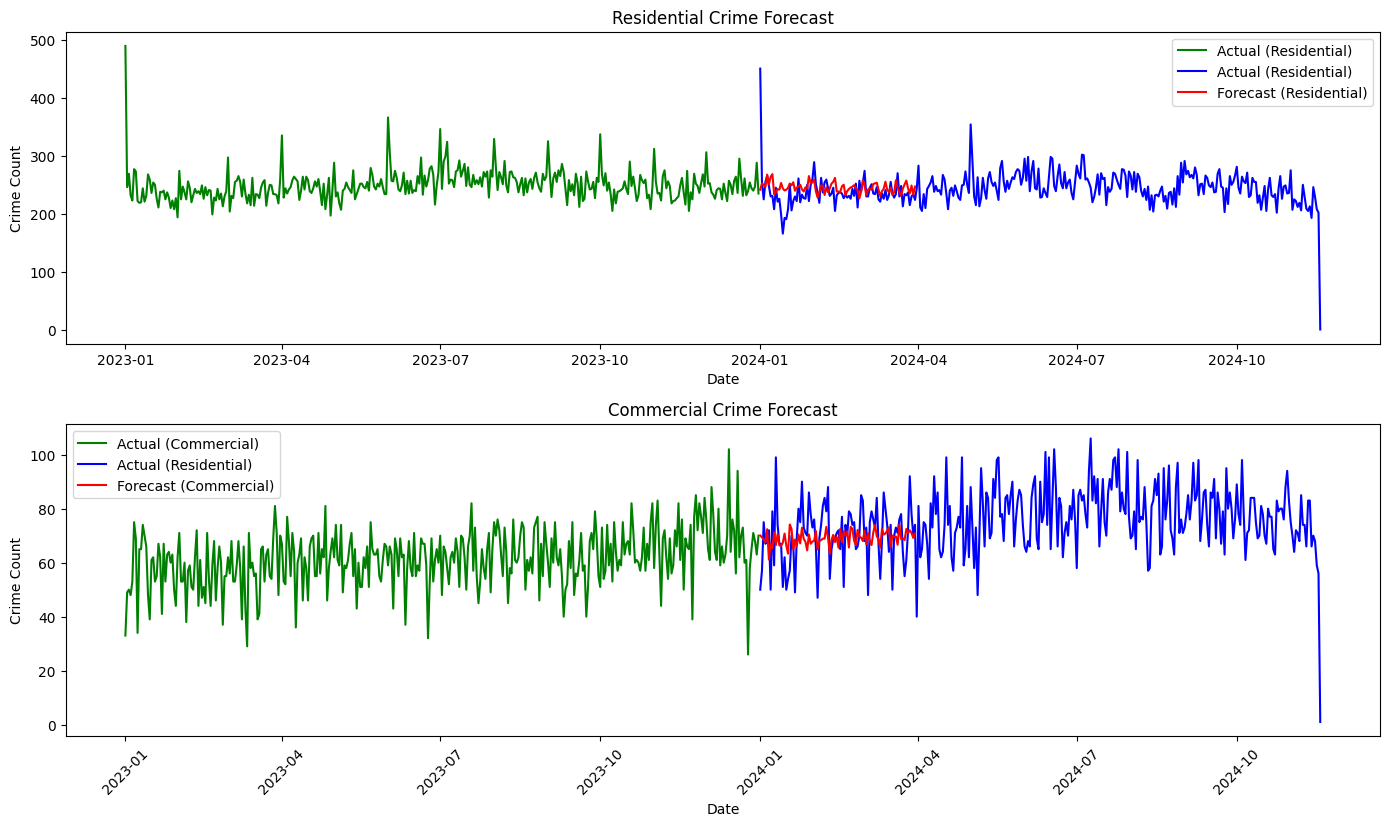

In [ ]:
plt.figure(figsize=(14, 8))

plt.subplot(2, 1, 1)
plt.plot(residential_counts.index, residential_counts, label='Actual (Residential)', color='green')
plt.plot(residential_counts_2024.index, residential_count_2024, label='Actual (Residential)', color='blue')
plt.plot(forecast_dates_residential, forecast_residential, label='Forecast (Residential)', color='red')
plt.title('Residential Crime Forecast')
plt.xlabel('Date')
plt.ylabel('Crime Count')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(commercial_counts.index, commercial_counts, label='Actual (Commercial)', color='green')
plt.plot(commercial_counts_2024.index, commercial_counts_2024, label='Actual (Residential)', color='blue')
plt.plot(forecast_dates_commercial, forecast_commercial, label='Forecast (Commercial)', color='red')
plt.title('Commercial Crime Forecast')
plt.xlabel('Date')
plt.ylabel('Crime Count')
plt.legend()

plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

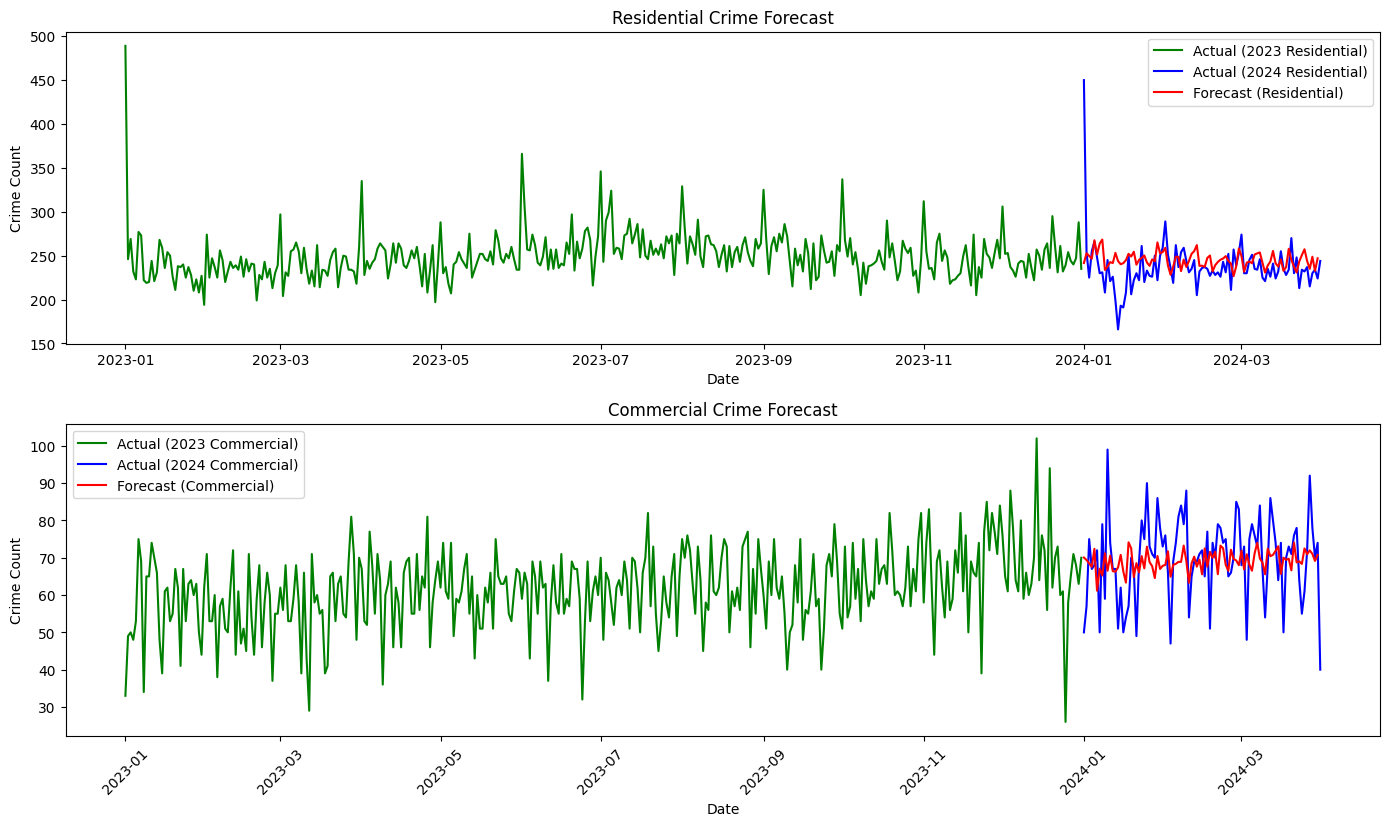

In [ ]:
residential_counts_2024_q1 = residential_count_2024.loc[
    (pd.to_datetime(residential_count_2024.index) >= pd.Timestamp('2024-01-01')) &
    (pd.to_datetime(residential_count_2024.index) <= pd.Timestamp('2024-03-31'))
]

commercial_counts_2024_q1 = commercial_counts_2024.loc[
    (pd.to_datetime(commercial_counts_2024.index) >= pd.Timestamp('2024-01-01')) &
    (pd.to_datetime(commercial_counts_2024.index) <= pd.Timestamp('2024-03-31'))
]

plt.figure(figsize=(14, 8))

# Residential Crime Forecast
plt.subplot(2, 1, 1)
plt.plot(residential_counts.index, residential_counts, label='Actual (2023 Residential)', color='green')
plt.plot(residential_counts_2024_q1.index, residential_counts_2024_q1, label='Actual (2024 Residential)', color='blue')
plt.plot(forecast_dates_residential, forecast_residential, label='Forecast (Residential)', color='red')
plt.title('Residential Crime Forecast')
plt.xlabel('Date')
plt.ylabel('Crime Count')
plt.legend()

# Commercial Crime Forecast
plt.subplot(2, 1, 2)
plt.plot(commercial_counts.index, commercial_counts, label='Actual (2023 Commercial)', color='green')
plt.plot(commercial_counts_2024_q1.index, commercial_counts_2024_q1, label='Actual (2024 Commercial)', color='blue')
plt.plot(forecast_dates_commercial, forecast_commercial, label='Forecast (Commercial)', color='red')
plt.title('Commercial Crime Forecast')
plt.xlabel('Date')
plt.ylabel('Crime Count')
plt.legend()

# Show plots
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()
